In [32]:
!pip install lightning

In [33]:
# Importar librerias
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as L
from copy import deepcopy as dc
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.optim import Adam
from pytorch_lightning.callbacks import Callback

In [34]:
# Cargar datos
data = pd.read_csv('/content/los_speed (12).csv')
data.columns = ['Timestamp', '715947', '716930', '718085', '716928', '718364', '716924', '763980',
                '716922', '768523', '716920', '715929', '716895', '716918', '716916', '763990',
                '715920', '715916', '716912', '716911', '716908', '759610', '716906', '716907',
                '763706', '716902', '763748', '716898', '762398']
data


,Timestamp,715947,716930,718085,716928,718364,716924,763980,716922,768523,...,716911,716908,759610,716906,716907,763706,716902,763748,716898,762398
0,12/03/2023 00:00,68.7,60.1,66.2,60.4,65.0,64.6,61.8,65.5,64.9,...,68.7,69.4,68.7,69.4,69.4,69.4,68.7,69.4,69.4,69.3
1,12/03/2023 00:05,68.5,61.0,68.0,60.8,65.7,65.3,61.7,65.5,64.5,...,68.5,69.1,68.5,69.1,69.1,69.1,68.5,69.1,69.1,69.0
2,12/03/2023 00:10,68.5,61.6,68.5,61.5,66.6,65.6,61.6,66.1,64.1,...,68.5,69.2,68.5,69.2,69.2,69.2,68.5,69.2,69.2,69.1
3,12/03/2023 00:15,68.6,62.3,68.6,62.5,67.5,67.0,62.9,67.8,65.5,...,68.6,69.5,68.6,69.5,69.5,69.5,68.6,69.5,69.5,69.4
4,12/03/2023 00:20,68.7,62.3,66.5,62.3,67.8,67.9,64.0,69.3,64.7,...,68.7,69.5,68.7,69.5,69.5,69.5,68.7,69.5,69.5,69.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,12/07/2023 23:35,68.6,55.6,65.6,59.8,68.7,65.9,55.2,64.9,55.4,...,68.7,69.9,68.7,69.9,69.9,69.9,68.7,69.9,69.9,69.8
1436,12/07/2023 23:40,68.7,61.0,66.9,62.9,70.6,67.6,58.0,66.4,51.9,...,68.6,69.9,68.6,69.9,69.9,69.9,68.6,69.9,69.9,69.8
1437,12/07/2023 23:45,68.5,59.0,64.4,61.0,69.4,64.9,56.2,66.4,52.9,...,69.0,70.0,69.0,70.0,70.0,70.0,69.0,70.0,70.0,69.9
1438,12/07/2023 23:50,68.6,55.2,64.5,60.0,67.8,65.7,54.4,66.2,55.7,...,69.1,69.8,69.1,69.8,69.8,69.8,69.1,69.8,69.8,69.7


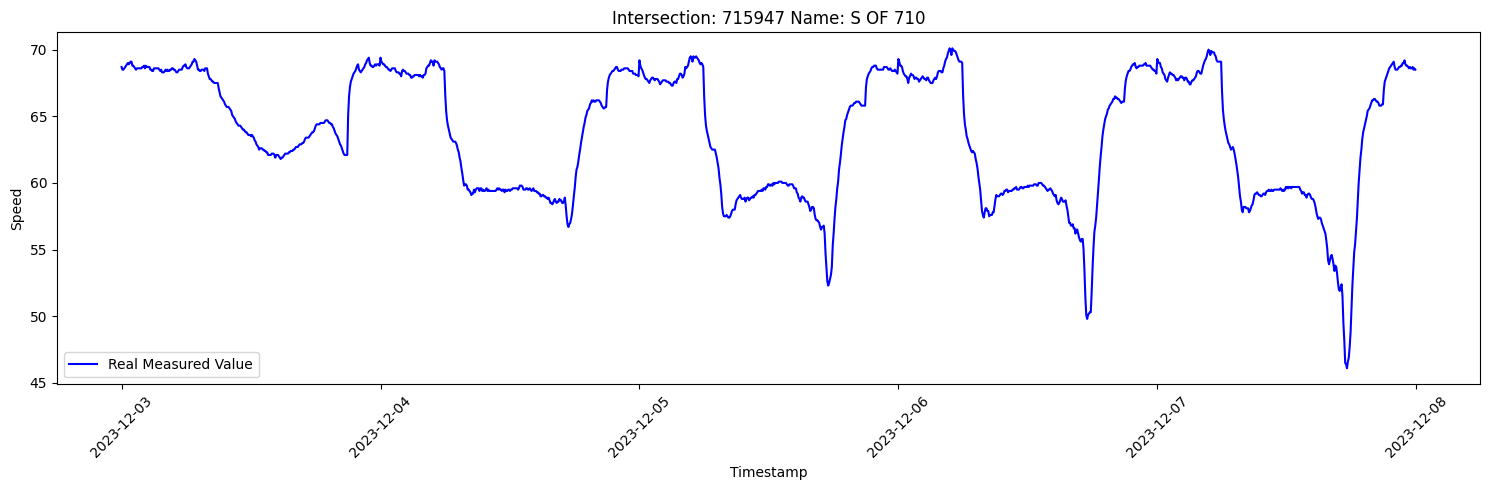

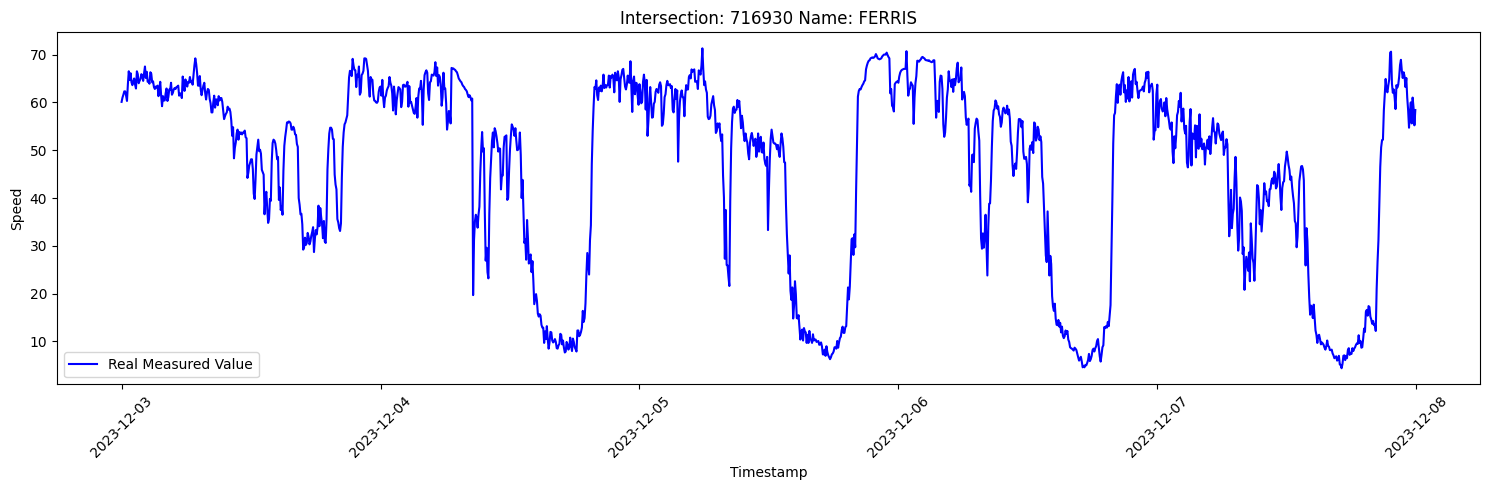

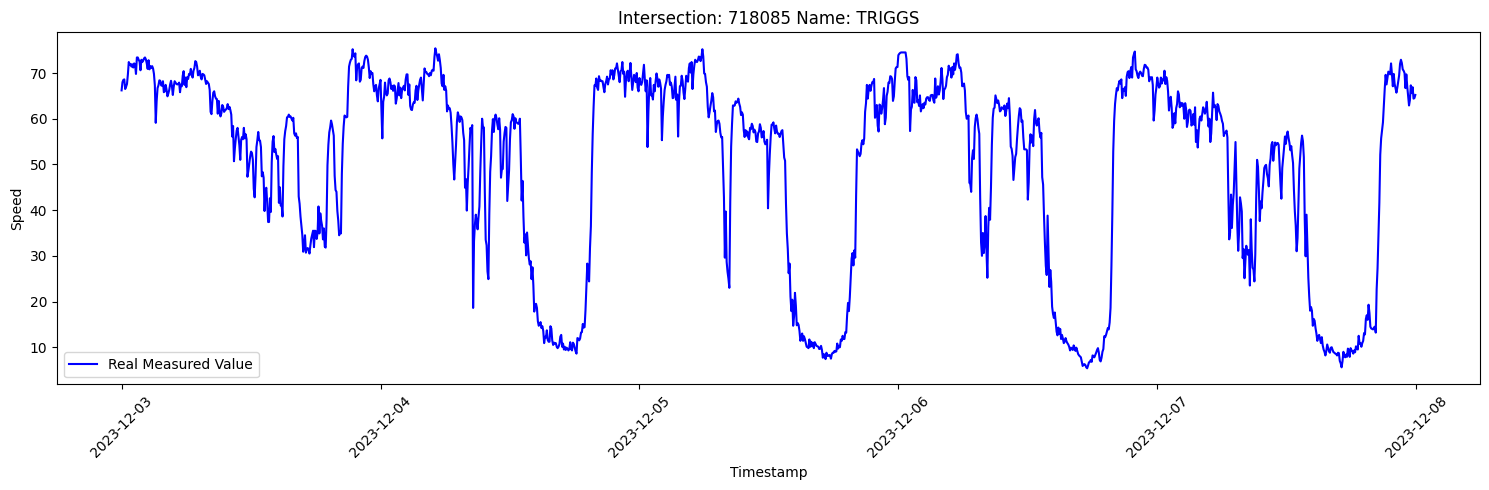

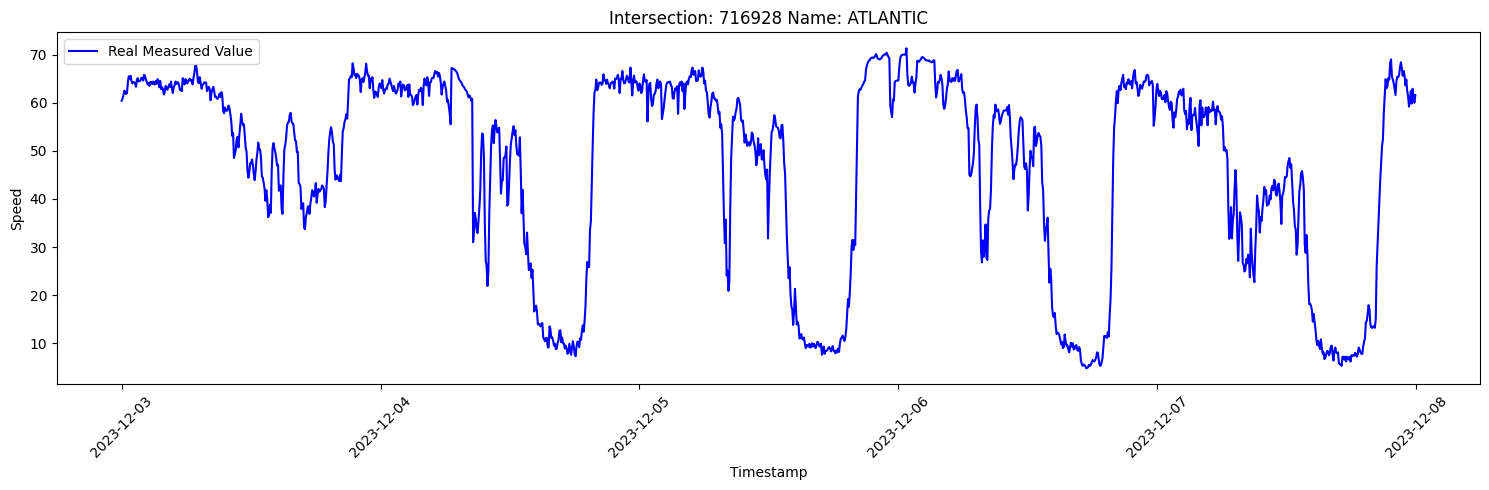

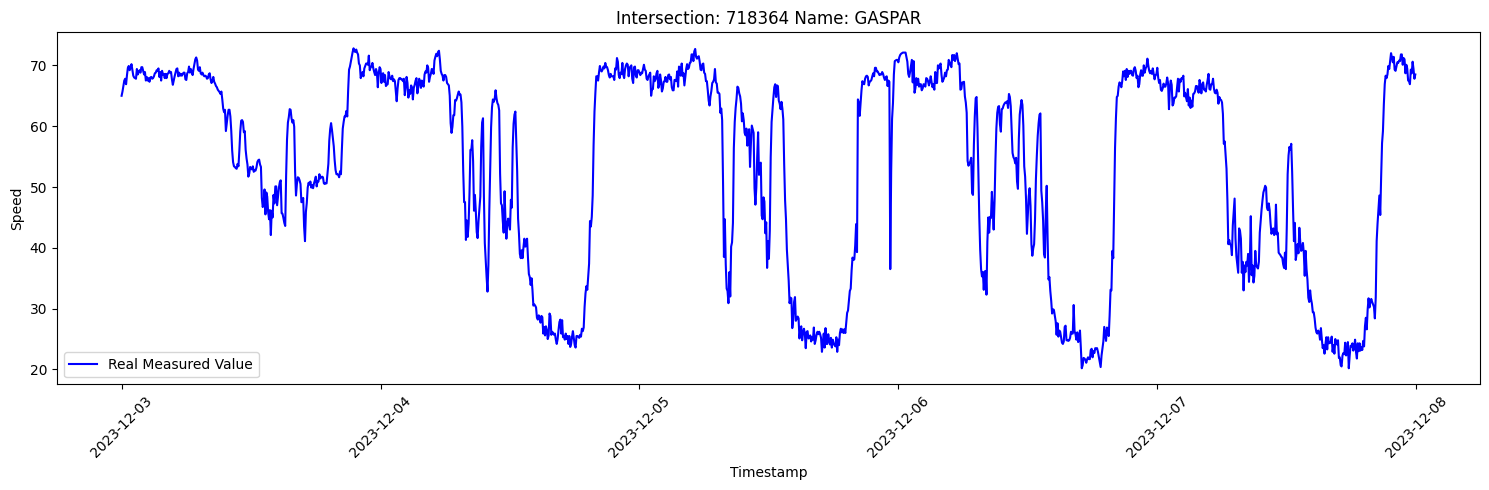

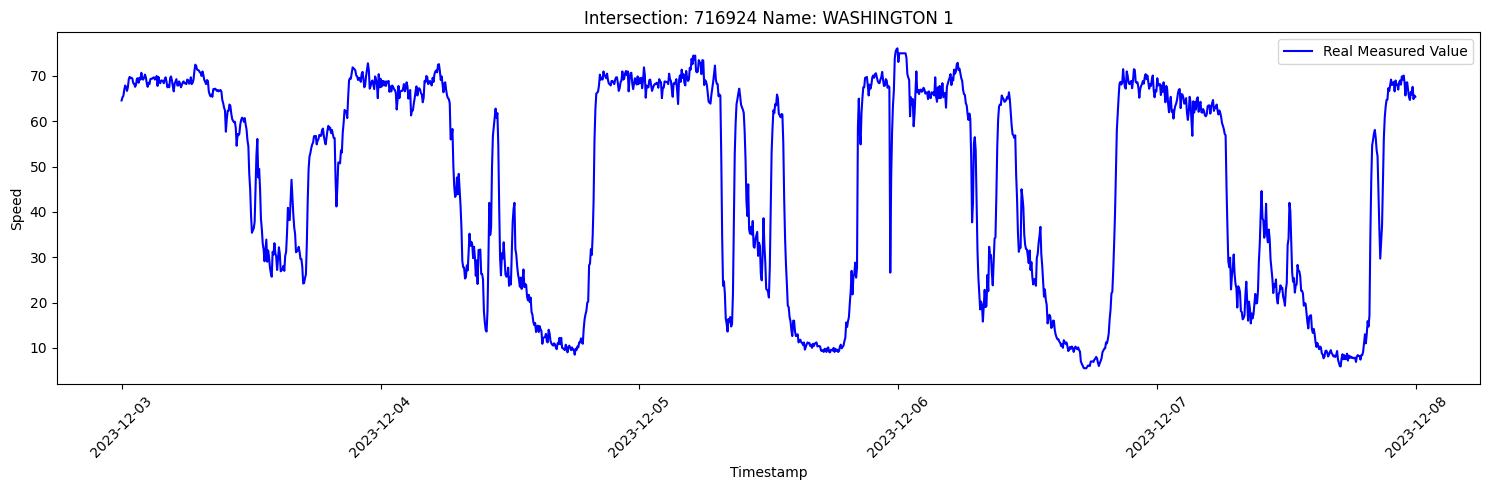

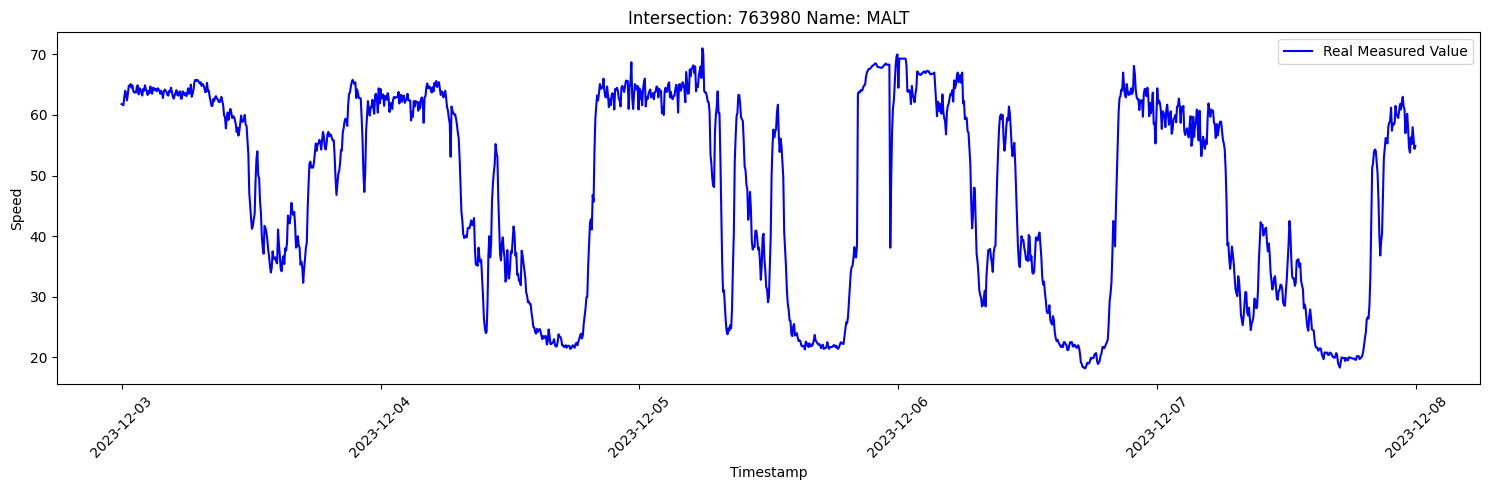

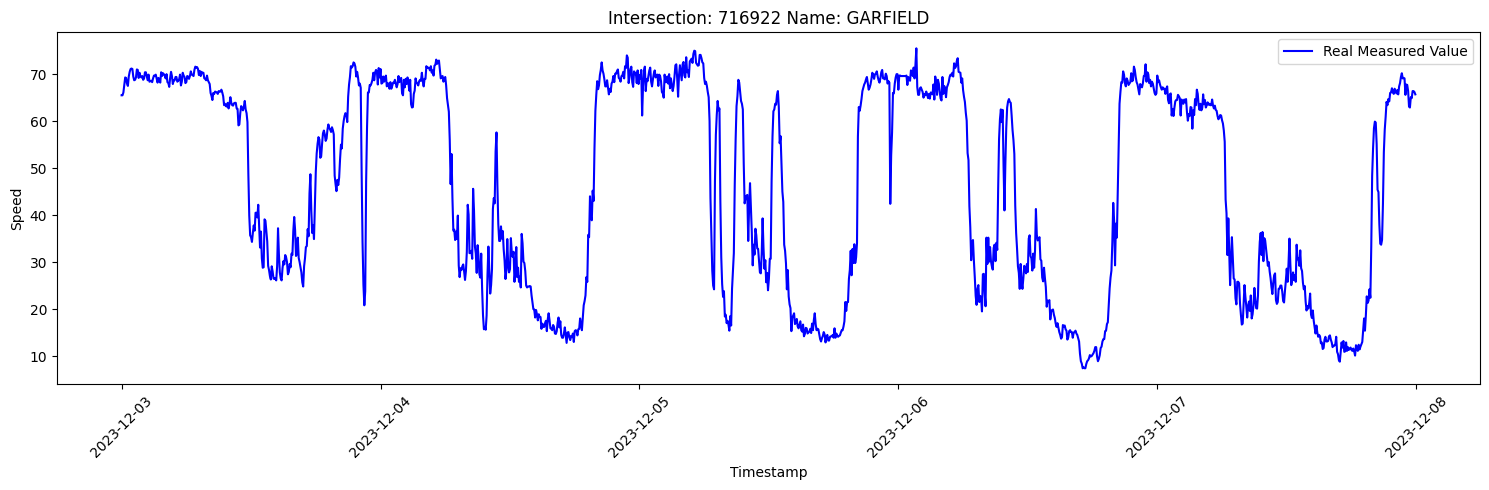

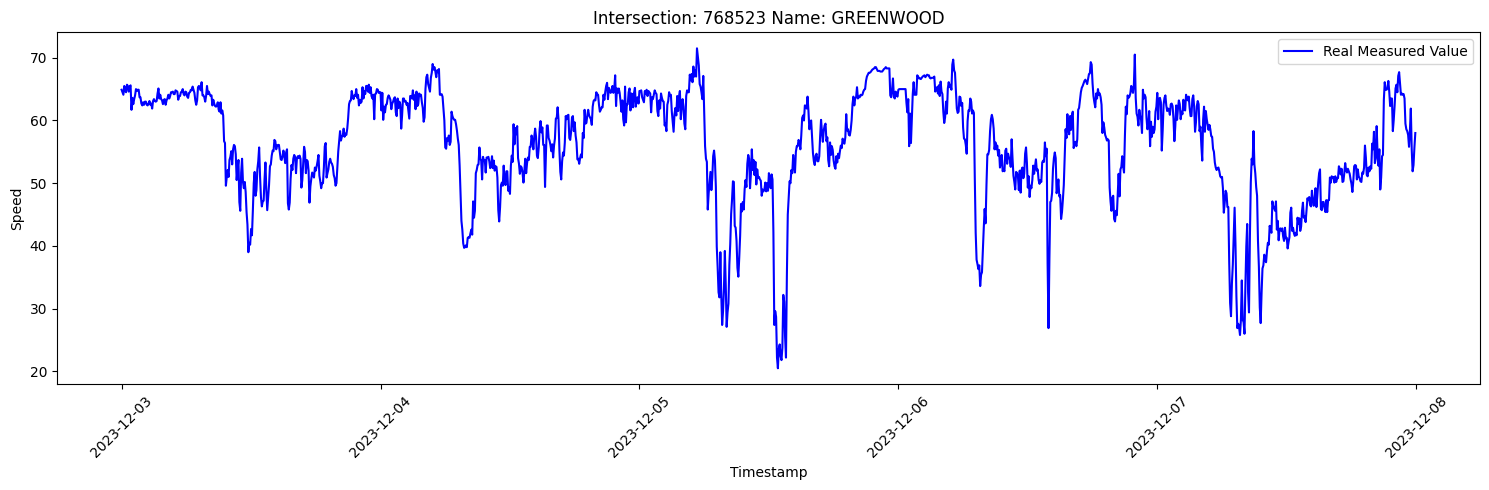

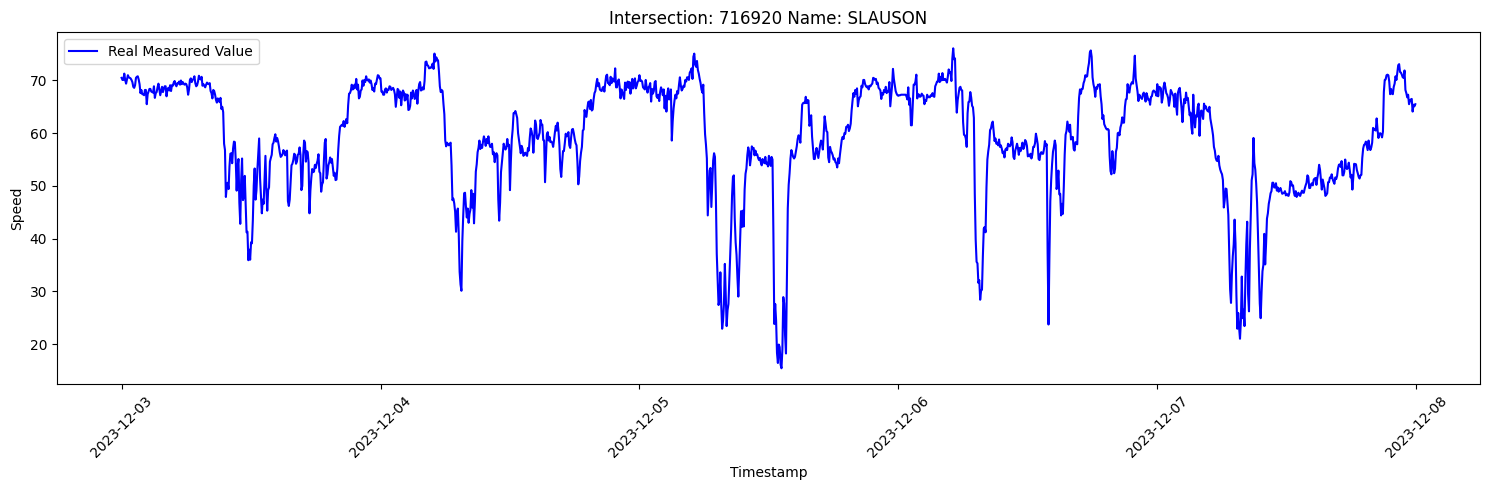

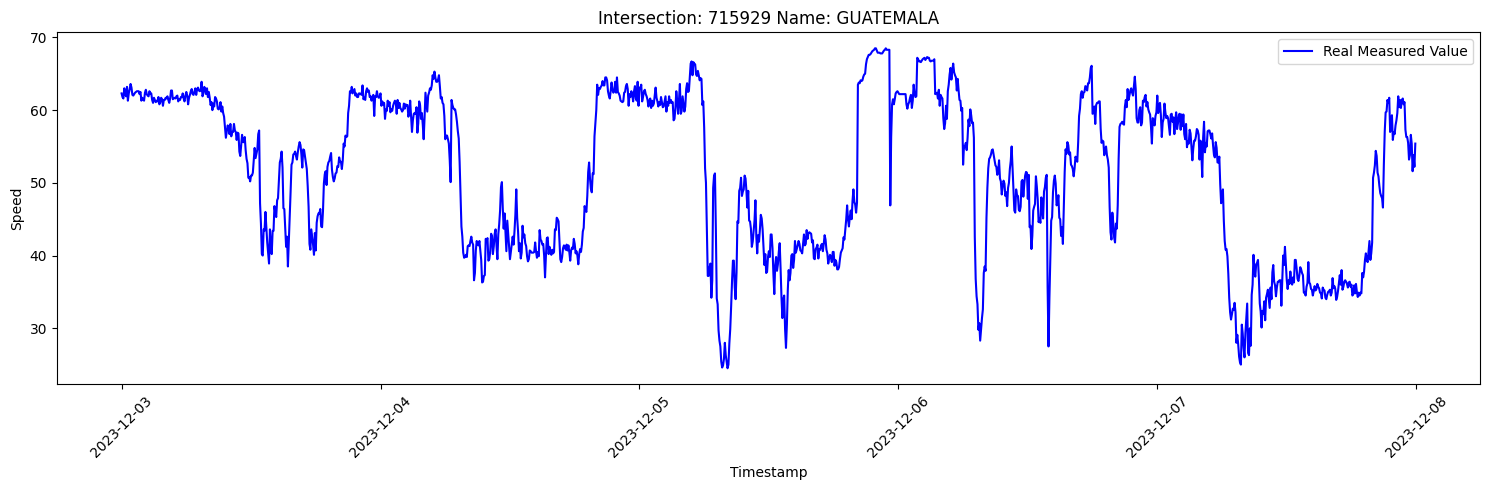

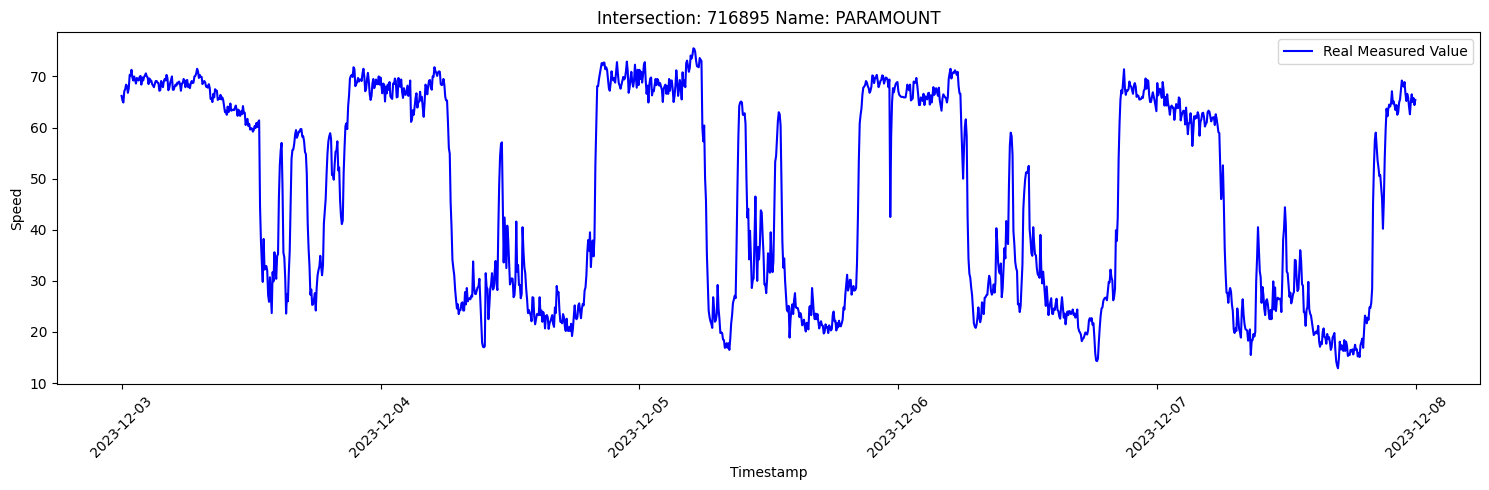

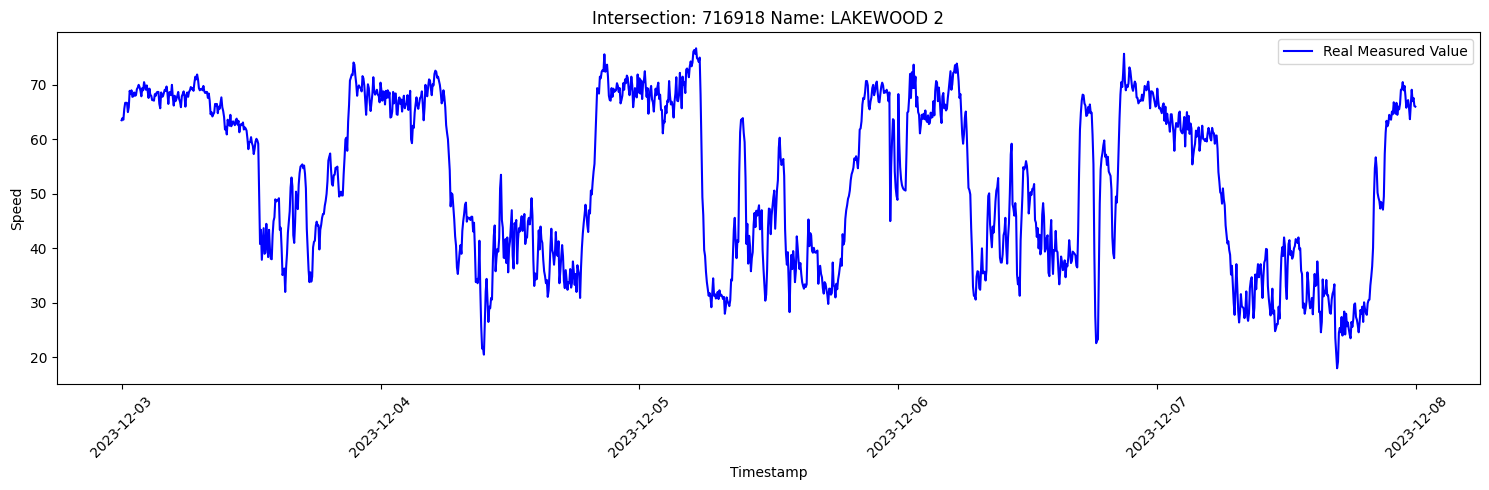

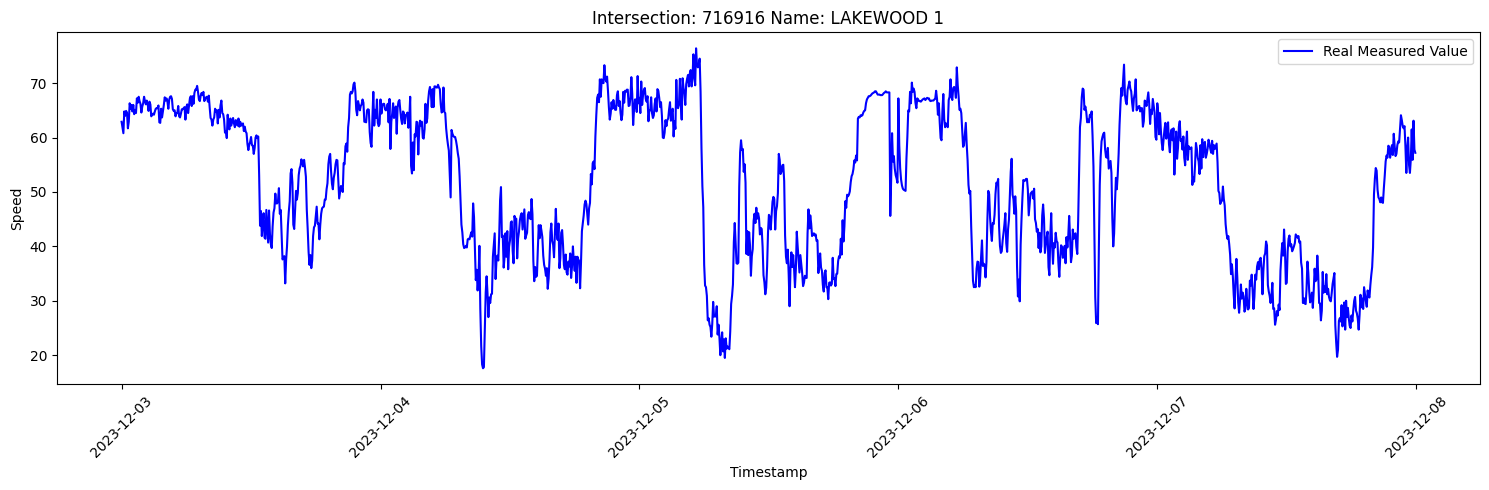

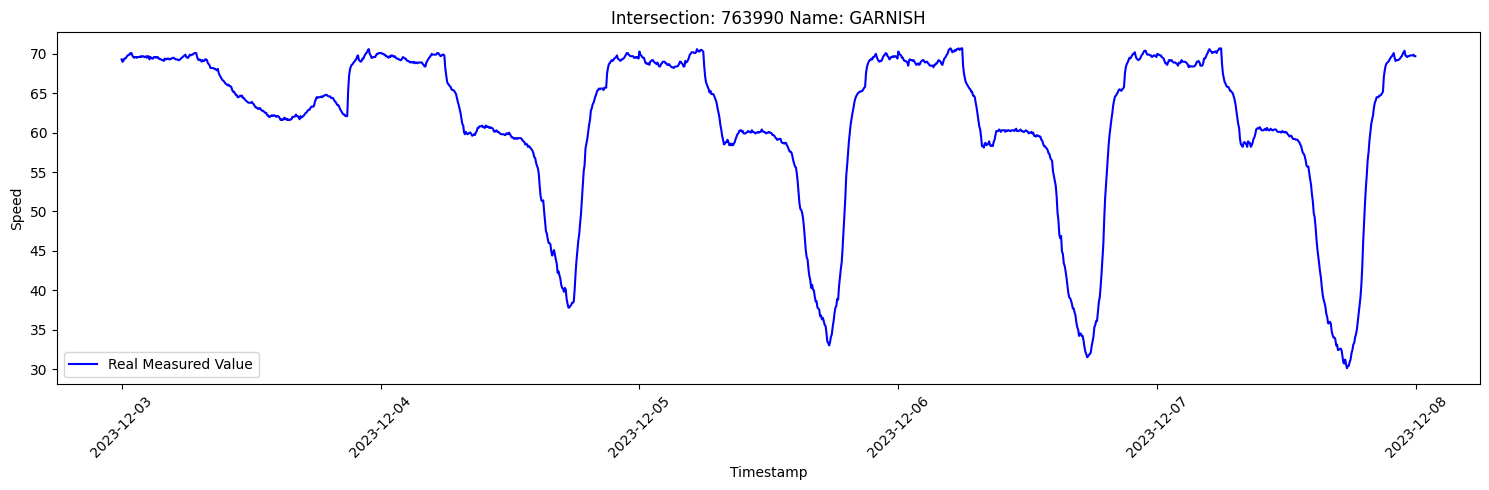

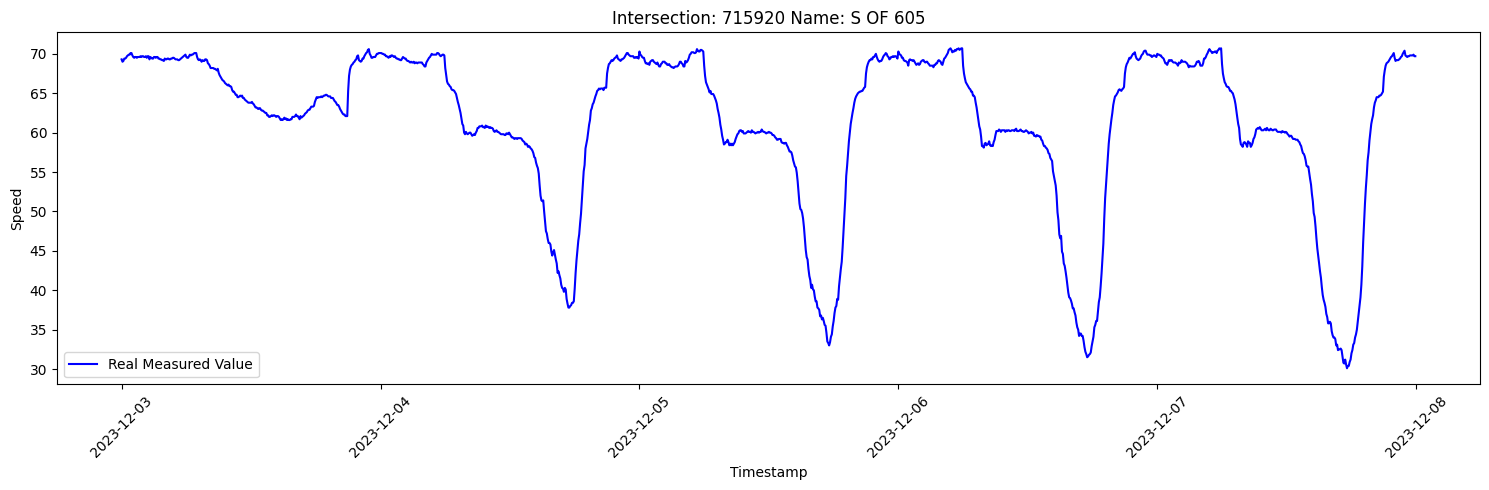

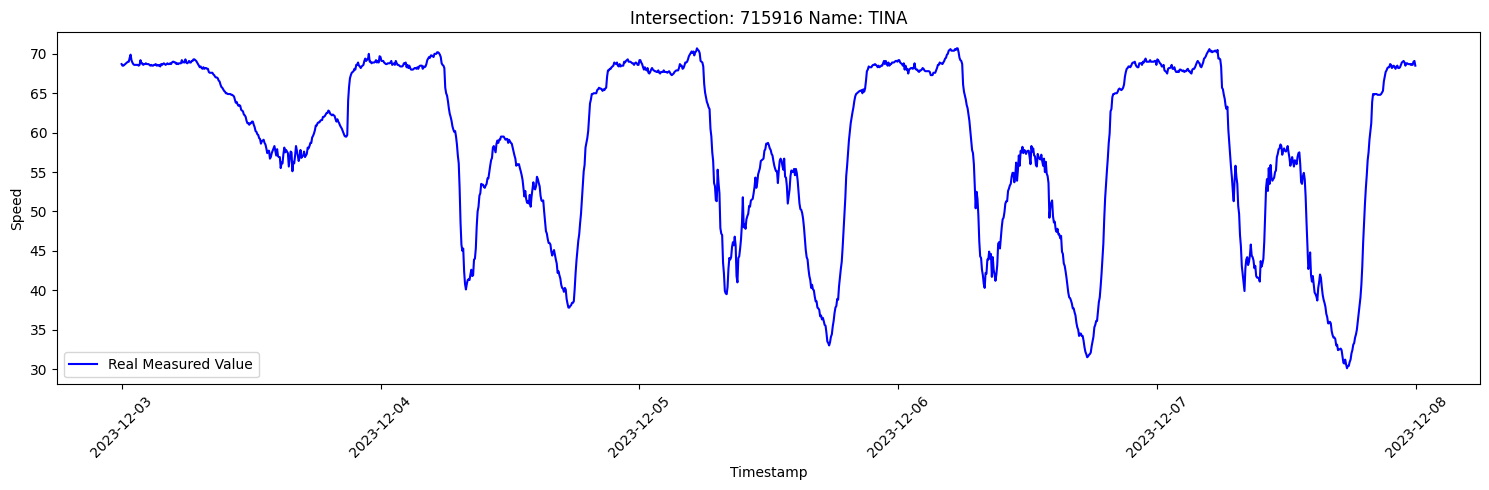

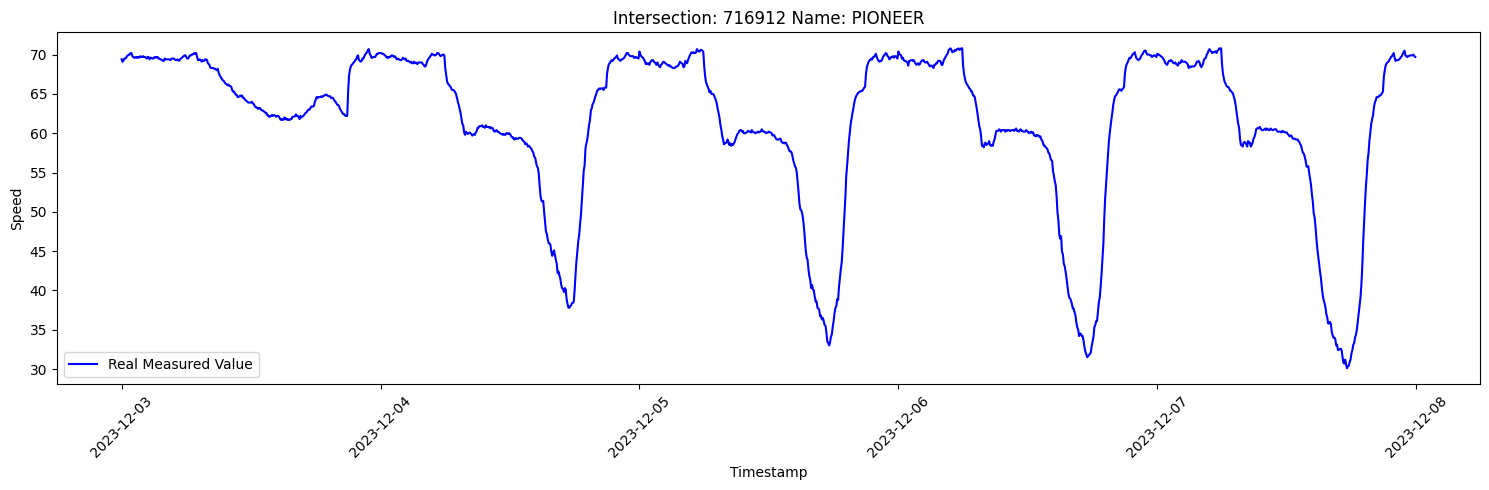

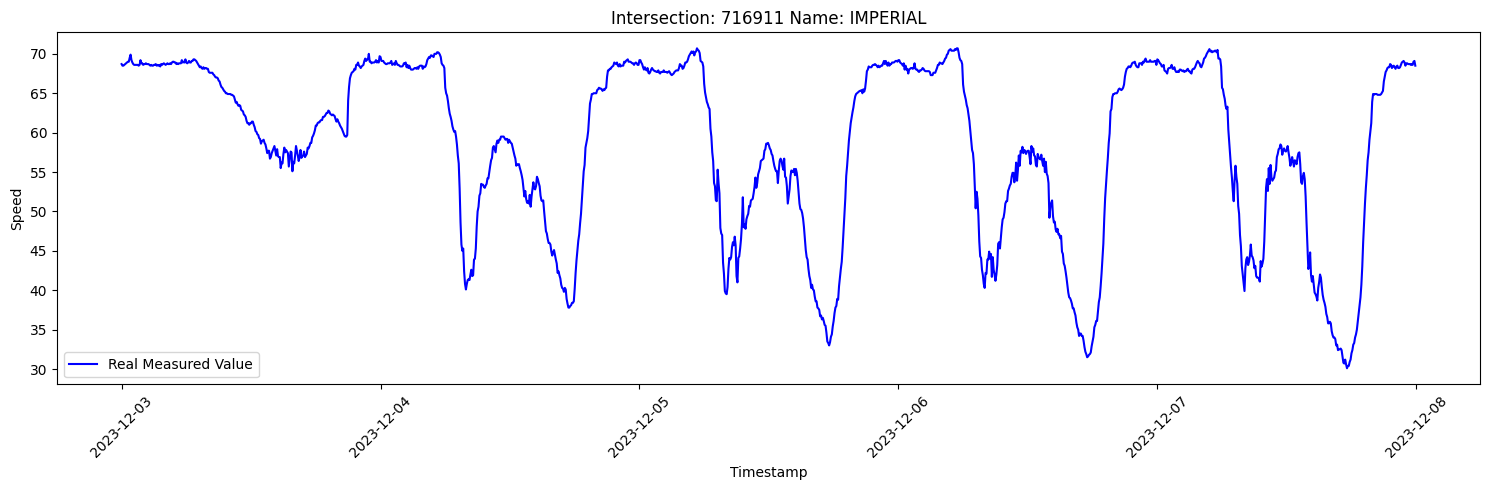

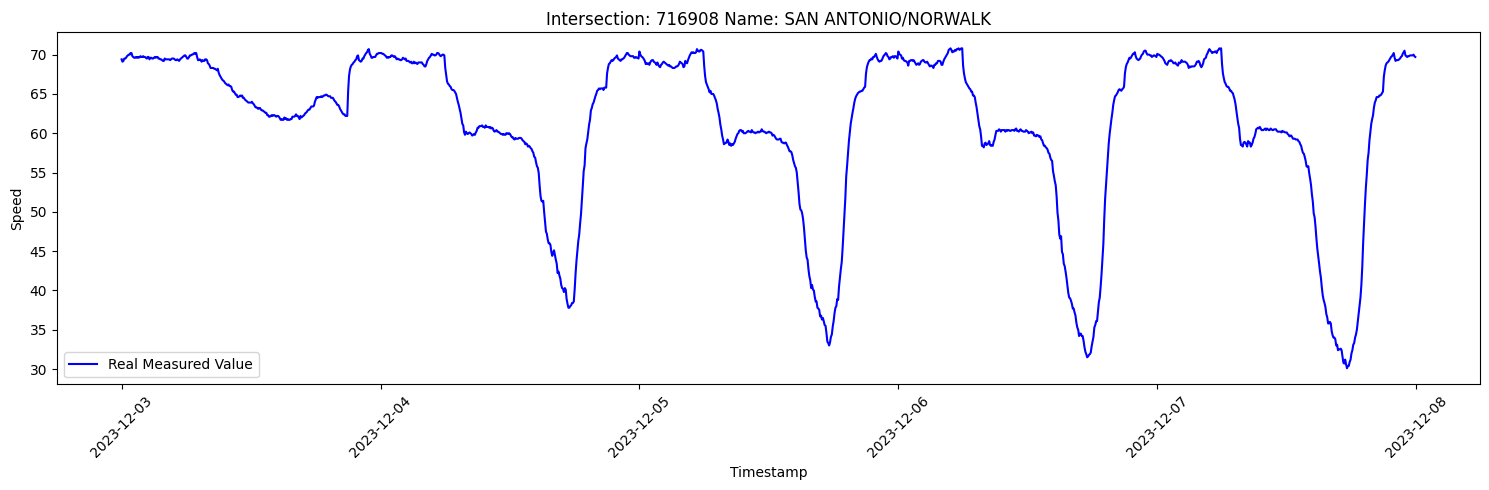

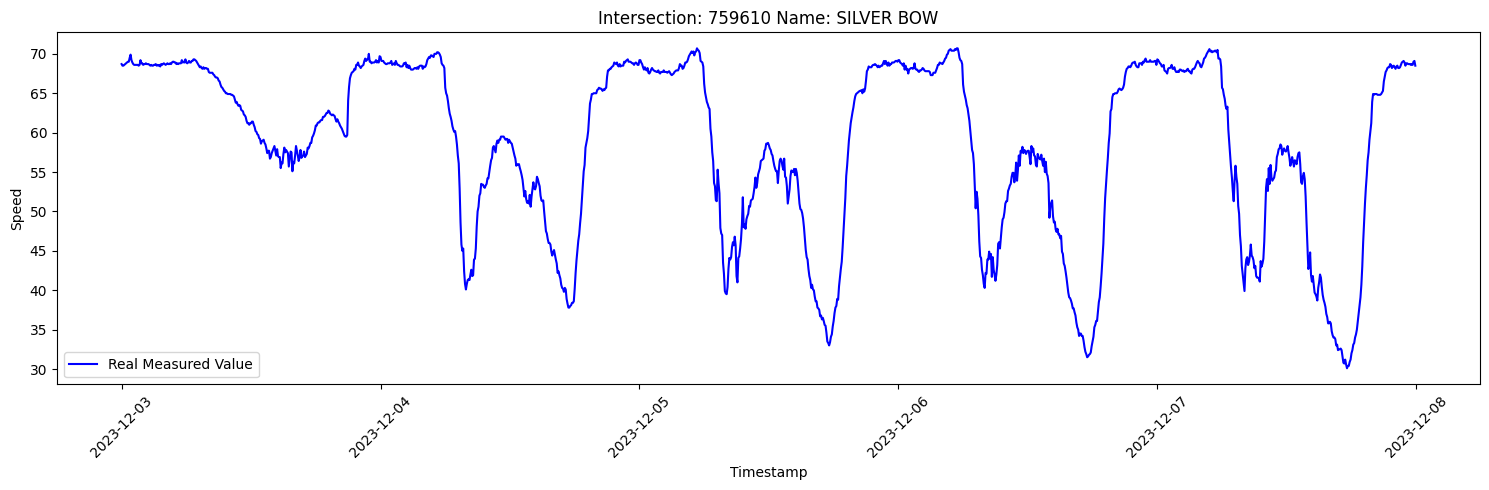

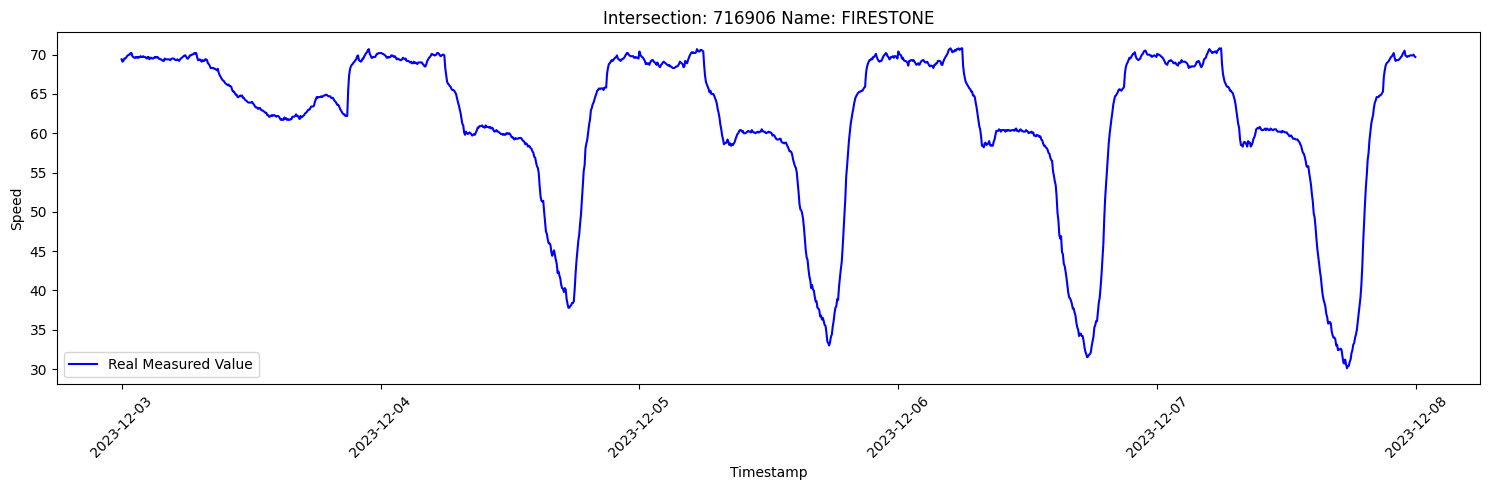

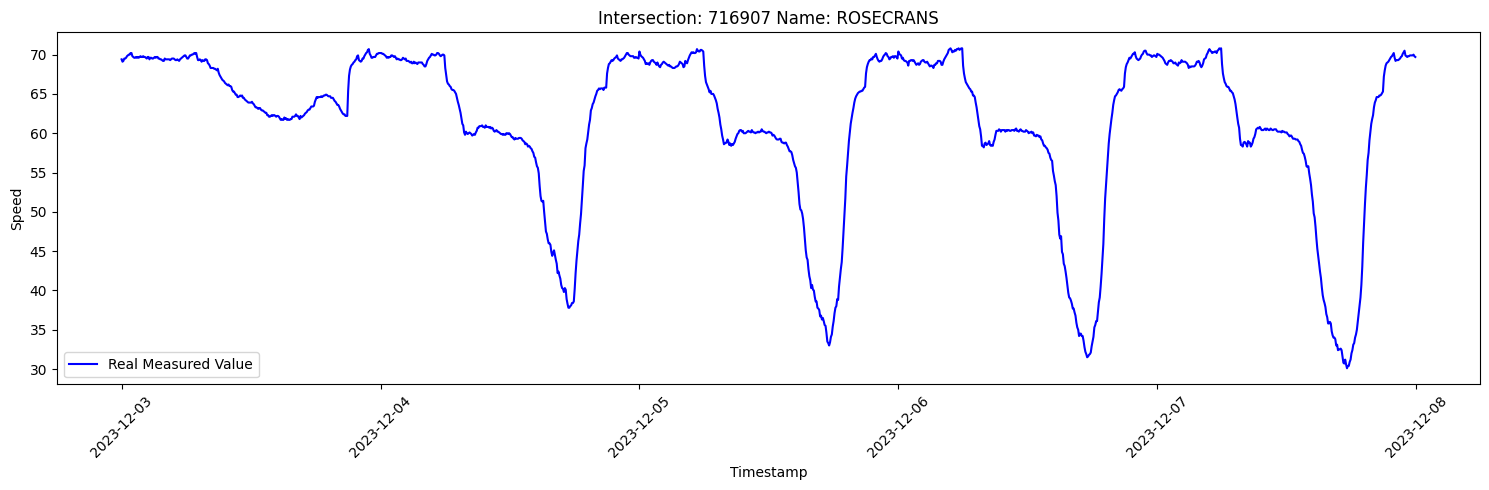

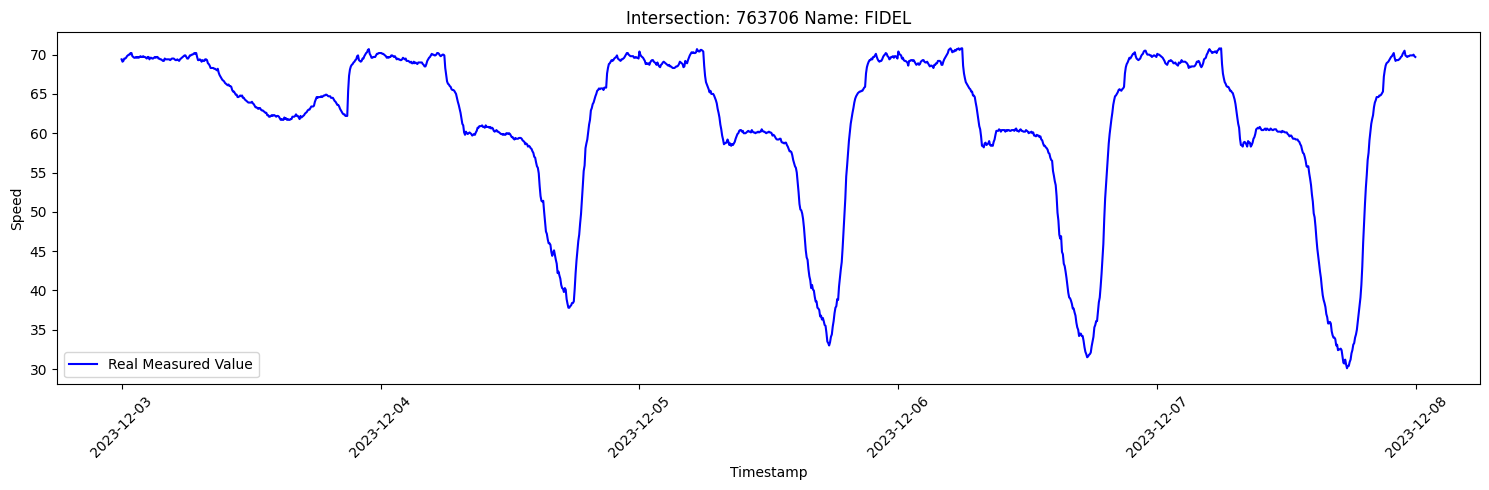

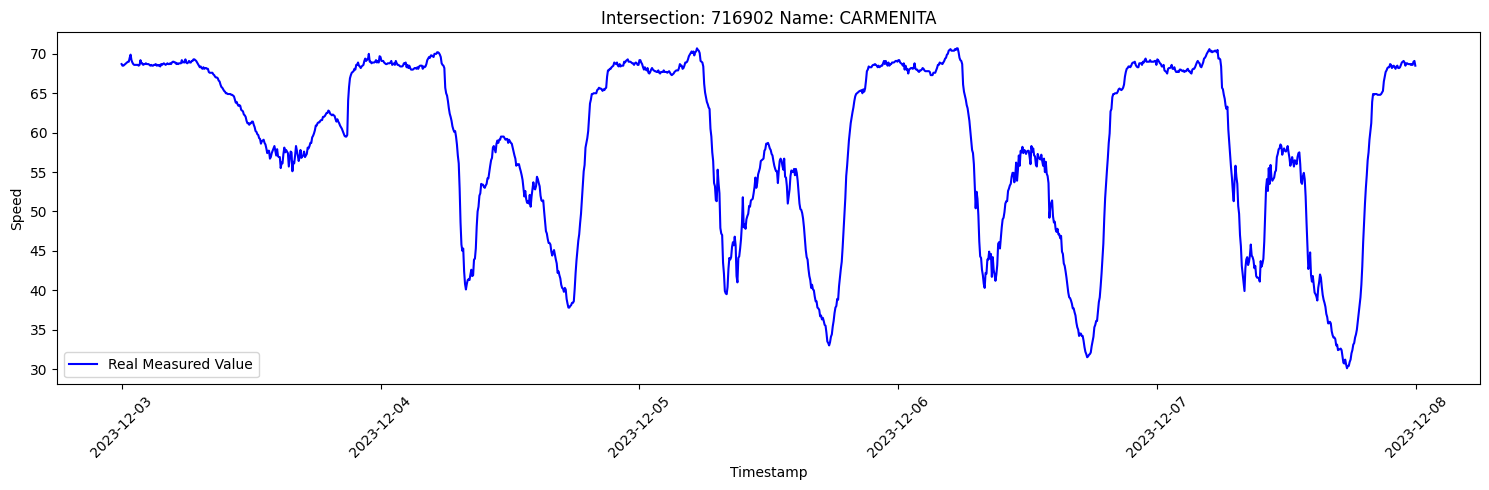

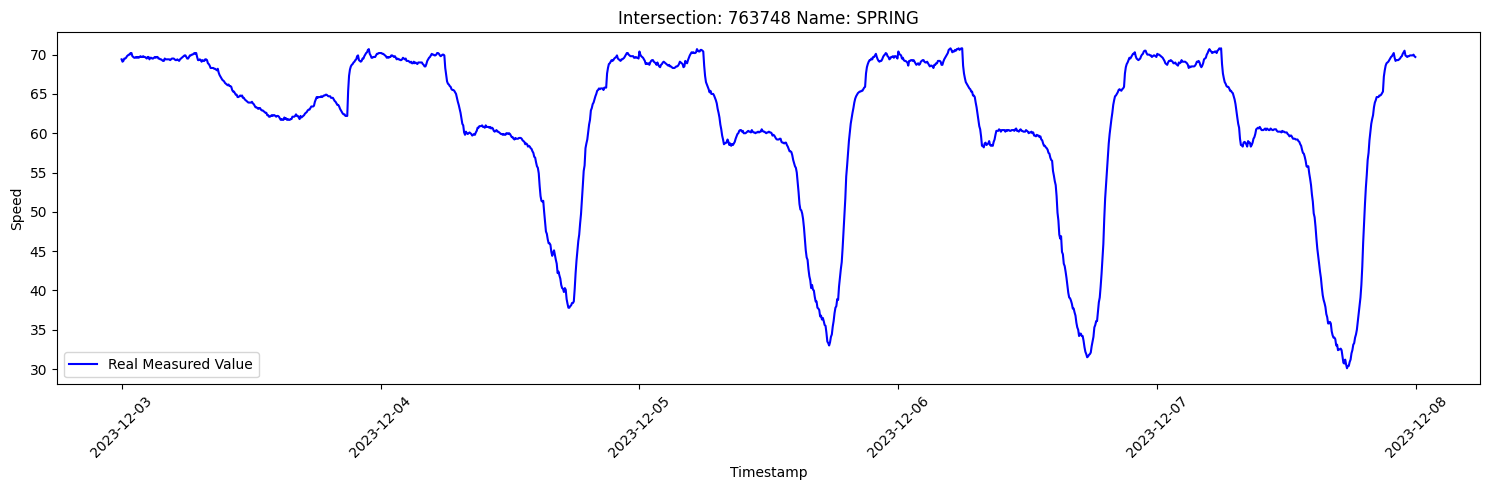

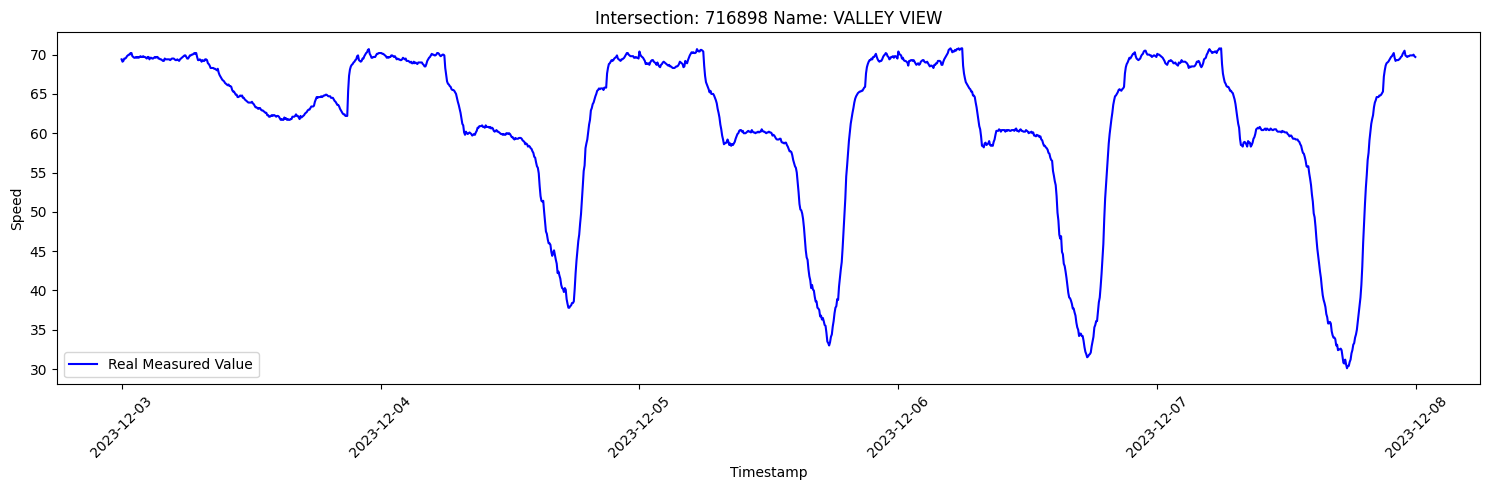

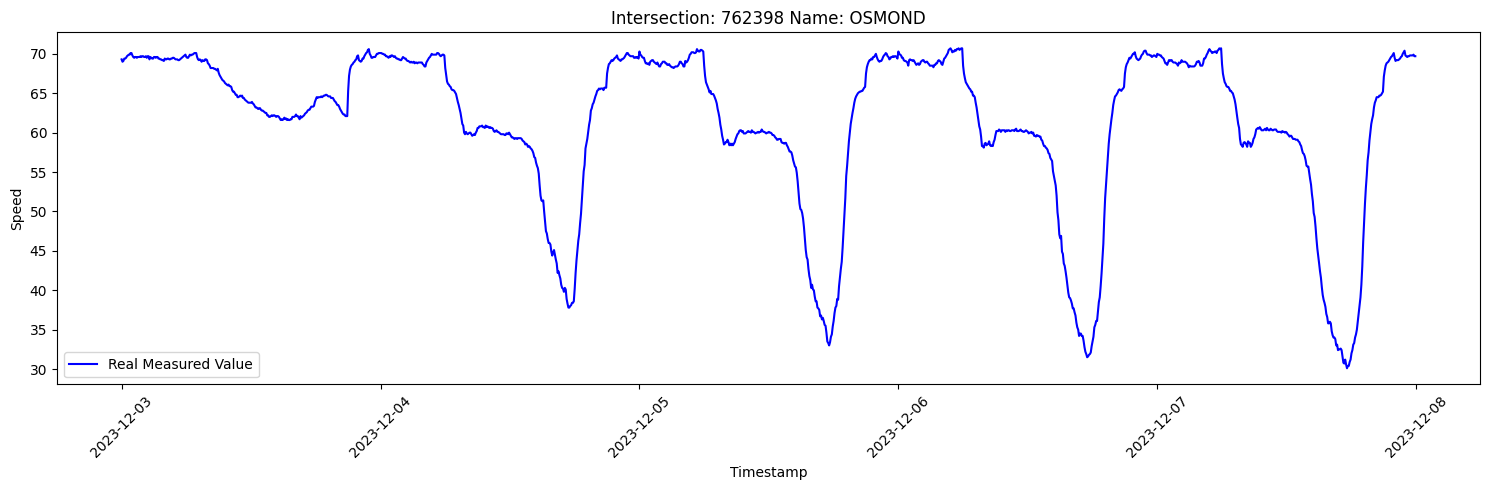

In [35]:
# Ver los datos antes
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['715947'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 715947 Name: S OF 710")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716930'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716930 Name: FERRIS")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['718085'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 718085 Name: TRIGGS")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716928'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716928 Name: ATLANTIC")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['718364'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 718364 Name: GASPAR")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716924'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716924 Name: WASHINGTON 1")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['763980'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 763980 Name: MALT")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716922'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716922 Name: GARFIELD")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['768523'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 768523 Name: GREENWOOD")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716920'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716920 Name: SLAUSON")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['715929'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 715929 Name: GUATEMALA")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716895'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716895 Name: PARAMOUNT")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716918'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716918 Name: LAKEWOOD 2")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716916'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716916 Name: LAKEWOOD 1")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['763990'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 763990 Name: GARNISH")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['715920'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 715920 Name: S OF 605")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['715916'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 715916 Name: TINA")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716912'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716912 Name: PIONEER")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716911'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716911 Name: IMPERIAL")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716908'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716908 Name: SAN ANTONIO/NORWALK")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['759610'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 759610 Name: SILVER BOW")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716906'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716906 Name: FIRESTONE")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716907'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716907 Name: ROSECRANS")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['763706'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 763706 Name: FIDEL")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716902'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716902 Name: CARMENITA")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['763748'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 763748 Name: SPRING")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['716898'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 716898 Name: VALLEY VIEW")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(data['Timestamp'], data['762398'], label="Real Measured Value", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Intersection: 762398 Name: OSMOND")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# FUNCIONES UTILES

# Preparar el dataset con n pasos de lookback
def prepare_dataframe_for_lstm(df, n_steps, node):
    df = dc(df)
    df.set_index('Timestamp', inplace=True)
    for i in range(1, n_steps+1):
        df[f'{node}(t-{i})'] = df[f'{node}'].shift(i)
    df.dropna(inplace=True)
    return df

In [37]:
# Separar dataframes
df_aux = data.copy()
df_n1 = df_aux[['Timestamp', '715947']]
df_n2 = df_aux[['Timestamp', '716930']]
df_n3 = df_aux[['Timestamp', '718085']]
df_n4 = df_aux[['Timestamp', '716928']]
df_n5 = df_aux[['Timestamp', '718364']]
df_n6 = df_aux[['Timestamp', '716924']]
df_n7 = df_aux[['Timestamp', '763980']]
df_n8 = df_aux[['Timestamp', '716922']]
df_n9 = df_aux[['Timestamp', '768523']]
df_n10 = df_aux[['Timestamp', '716920']]
df_n11 = df_aux[['Timestamp', '715929']]
df_n12 = df_aux[['Timestamp', '716895']]
df_n13 = df_aux[['Timestamp', '716918']]
df_n14 = df_aux[['Timestamp', '716916']]
df_n15 = df_aux[['Timestamp', '763990']]
df_n16 = df_aux[['Timestamp', '715920']]
df_n17 = df_aux[['Timestamp', '715916']]
df_n18 = df_aux[['Timestamp', '716912']]
df_n19 = df_aux[['Timestamp', '716911']]
df_n20 = df_aux[['Timestamp', '716908']]
df_n21 = df_aux[['Timestamp', '759610']]
df_n22 = df_aux[['Timestamp', '716906']]
df_n23 = df_aux[['Timestamp', '716907']]
df_n24 = df_aux[['Timestamp', '763706']]
df_n25 = df_aux[['Timestamp', '716902']]
df_n26 = df_aux[['Timestamp', '763748']]
df_n27 = df_aux[['Timestamp', '716898']]
#df_n28 = df_aux[['Timestamp', '716896']] No hay datos para PHOEBE
df_n29 = df_aux[['Timestamp', '762398']]
#df_n30 = df_aux[['Timestamp', '762347']] No hay datos para ARTESIA
df_n1

,Timestamp,715947
0,2023-12-03 00:00:00,68.7
1,2023-12-03 00:05:00,68.5
2,2023-12-03 00:10:00,68.5
3,2023-12-03 00:15:00,68.6
4,2023-12-03 00:20:00,68.7
...,...,...
1435,2023-12-07 23:35:00,68.6
1436,2023-12-07 23:40:00,68.7
1437,2023-12-07 23:45:00,68.5
1438,2023-12-07 23:50:00,68.6


In [38]:
lookback = 4
shifted_df_n1 = prepare_dataframe_for_lstm(df_n1, lookback, 715947)
shifted_df_n2 = prepare_dataframe_for_lstm(df_n2, lookback, 716930)
shifted_df_n3 = prepare_dataframe_for_lstm(df_n3, lookback, 718085)
shifted_df_n4 = prepare_dataframe_for_lstm(df_n4, lookback, 716928)
shifted_df_n5 = prepare_dataframe_for_lstm(df_n5, lookback, 718364)
shifted_df_n6 = prepare_dataframe_for_lstm(df_n6, lookback, 716924)
shifted_df_n7 = prepare_dataframe_for_lstm(df_n7, lookback, 763980)
shifted_df_n8 = prepare_dataframe_for_lstm(df_n8, lookback, 716922)
shifted_df_n9 = prepare_dataframe_for_lstm(df_n9, lookback, 768523)
shifted_df_n10 = prepare_dataframe_for_lstm(df_n10, lookback, 716920)
shifted_df_n11 = prepare_dataframe_for_lstm(df_n11, lookback, 715929)
shifted_df_n12 = prepare_dataframe_for_lstm(df_n12, lookback, 716895)
shifted_df_n13 = prepare_dataframe_for_lstm(df_n13, lookback, 716918)
shifted_df_n14 = prepare_dataframe_for_lstm(df_n14, lookback, 716916)
shifted_df_n15 = prepare_dataframe_for_lstm(df_n15, lookback, 763990)
shifted_df_n16 = prepare_dataframe_for_lstm(df_n16, lookback, 715920)
shifted_df_n17 = prepare_dataframe_for_lstm(df_n17, lookback, 715916)
shifted_df_n18 = prepare_dataframe_for_lstm(df_n18, lookback, 716912)
shifted_df_n19 = prepare_dataframe_for_lstm(df_n19, lookback, 716911)
shifted_df_n20 = prepare_dataframe_for_lstm(df_n20, lookback, 716908)
shifted_df_n21 = prepare_dataframe_for_lstm(df_n21, lookback, 759610)
shifted_df_n22 = prepare_dataframe_for_lstm(df_n22, lookback, 716906)
shifted_df_n23 = prepare_dataframe_for_lstm(df_n23, lookback, 716907)
shifted_df_n24 = prepare_dataframe_for_lstm(df_n24, lookback, 763706)
shifted_df_n25 = prepare_dataframe_for_lstm(df_n25, lookback, 716902)
shifted_df_n26 = prepare_dataframe_for_lstm(df_n26, lookback, 763748)
shifted_df_n27 = prepare_dataframe_for_lstm(df_n27, lookback, 716898)
#shifted_df_n28 = prepare_dataframe_for_lstm(df_n28, lookback, 716896) No hay datos para PHOEBE
shifted_df_n29 = prepare_dataframe_for_lstm(df_n29, lookback, 762398)
#shifted_df_n30 = prepare_dataframe_for_lstm(df_n30, lookback, 762347) No hay datos para ARTESIA
shifted_df_n1

,715947,715947(t-1),715947(t-2),715947(t-3),715947(t-4)
Timestamp,,,,,
2023-12-03 00:20:00,68.7,68.6,68.5,68.5,68.7
2023-12-03 00:25:00,68.8,68.7,68.6,68.5,68.5
2023-12-03 00:30:00,68.9,68.8,68.7,68.6,68.5
2023-12-03 00:35:00,69.0,68.9,68.8,68.7,68.6
2023-12-03 00:40:00,68.9,69.0,68.9,68.8,68.7
...,...,...,...,...,...
2023-12-07 23:35:00,68.6,68.6,68.7,68.6,68.7
2023-12-07 23:40:00,68.7,68.6,68.6,68.7,68.6
2023-12-07 23:45:00,68.5,68.7,68.6,68.6,68.7


In [39]:
# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 0.7)) # feature_range=(-1, 1) (0,0.7)
shifted_df_n1_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n1), columns=shifted_df_n1.columns)
shifted_df_n2_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n2), columns=shifted_df_n2.columns)
shifted_df_n3_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n3), columns=shifted_df_n3.columns)
shifted_df_n4_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n4), columns=shifted_df_n4.columns)
shifted_df_n5_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n5), columns=shifted_df_n5.columns)
shifted_df_n6_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n6), columns=shifted_df_n6.columns)
shifted_df_n7_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n7), columns=shifted_df_n7.columns)
shifted_df_n8_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n8), columns=shifted_df_n8.columns)
shifted_df_n9_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n9), columns=shifted_df_n9.columns)
shifted_df_n10_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n10), columns=shifted_df_n10.columns)
shifted_df_n11_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n11), columns=shifted_df_n11.columns)
shifted_df_n12_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n12), columns=shifted_df_n12.columns)
shifted_df_n13_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n13), columns=shifted_df_n13.columns)
shifted_df_n14_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n14), columns=shifted_df_n14.columns)
shifted_df_n15_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n15), columns=shifted_df_n15.columns)
shifted_df_n16_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n16), columns=shifted_df_n16.columns)
shifted_df_n17_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n17), columns=shifted_df_n17.columns)
shifted_df_n18_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n18), columns=shifted_df_n18.columns)
shifted_df_n19_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n19), columns=shifted_df_n19.columns)
shifted_df_n20_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n20), columns=shifted_df_n20.columns)
shifted_df_n21_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n21), columns=shifted_df_n21.columns)
shifted_df_n22_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n22), columns=shifted_df_n22.columns)
shifted_df_n23_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n23), columns=shifted_df_n23.columns)
shifted_df_n24_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n24), columns=shifted_df_n24.columns)
shifted_df_n25_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n25), columns=shifted_df_n25.columns)
shifted_df_n26_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n26), columns=shifted_df_n26.columns)
shifted_df_n27_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n27), columns=shifted_df_n27.columns)
#shifted_df_n28_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n28), columns=shifted_df_n28.columns) No hay datos para PHOEBE
shifted_df_n29_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n29), columns=shifted_df_n29.columns)
#shifted_df_n30_scaled = pd.DataFrame(scaler.fit_transform(shifted_df_n30), columns=shifted_df_n30.columns) No hay datos para ARTESIA

shifted_df_n1_scaled # Orden Actual Label/t-1/t-2/t-3/t-4

,715947,715947(t-1),715947(t-2),715947(t-3),715947(t-4)
0,0.659167,0.656250,0.653333,0.653333,0.659167
1,0.662083,0.659167,0.656250,0.653333,0.653333
2,0.665000,0.662083,0.659167,0.656250,0.653333
3,0.667917,0.665000,0.662083,0.659167,0.656250
4,0.665000,0.667917,0.665000,0.662083,0.659167
...,...,...,...,...,...
1431,0.656250,0.656250,0.659167,0.656250,0.659167
1432,0.659167,0.656250,0.656250,0.659167,0.656250
1433,0.653333,0.659167,0.656250,0.656250,0.659167
1434,0.656250,0.653333,0.659167,0.656250,0.656250


In [40]:
# Reordenamiento Label/t-4/t-3/t-2/t-1
nuevo_orden_n1 = ['715947', '715947(t-4)', '715947(t-3)', '715947(t-2)', '715947(t-1)']
shifted_df_n1_scaled = shifted_df_n1_scaled[nuevo_orden_n1]

nuevo_orden_n2 = ['716930', '716930(t-4)', '716930(t-3)', '716930(t-2)', '716930(t-1)']
shifted_df_n2_scaled = shifted_df_n2_scaled[nuevo_orden_n2]

nuevo_orden_n3 = ['718085', '718085(t-4)', '718085(t-3)', '718085(t-2)', '718085(t-1)']
shifted_df_n3_scaled = shifted_df_n3_scaled[nuevo_orden_n3]

nuevo_orden_n4 = ['716928', '716928(t-4)', '716928(t-3)', '716928(t-2)', '716928(t-1)']
shifted_df_n4_scaled = shifted_df_n4_scaled[nuevo_orden_n4]

nuevo_orden_n5 = ['718364', '718364(t-4)', '718364(t-3)', '718364(t-2)', '718364(t-1)']
shifted_df_n5_scaled = shifted_df_n5_scaled[nuevo_orden_n5]

nuevo_orden_n6 = ['716924', '716924(t-4)', '716924(t-3)', '716924(t-2)', '716924(t-1)']
shifted_df_n6_scaled = shifted_df_n6_scaled[nuevo_orden_n6]

nuevo_orden_n7 = ['763980', '763980(t-4)', '763980(t-3)', '763980(t-2)', '763980(t-1)']
shifted_df_n7_scaled = shifted_df_n7_scaled[nuevo_orden_n7]

nuevo_orden_n8 = ['716922', '716922(t-4)', '716922(t-3)', '716922(t-2)', '716922(t-1)']
shifted_df_n8_scaled = shifted_df_n8_scaled[nuevo_orden_n8]

nuevo_orden_n9 = ['768523', '768523(t-4)', '768523(t-3)', '768523(t-2)', '768523(t-1)']
shifted_df_n9_scaled = shifted_df_n9_scaled[nuevo_orden_n9]

nuevo_orden_n10 = ['716920', '716920(t-4)', '716920(t-3)', '716920(t-2)', '716920(t-1)']
shifted_df_n10_scaled = shifted_df_n10_scaled[nuevo_orden_n10]

nuevo_orden_n11 = ['715929', '715929(t-4)', '715929(t-3)', '715929(t-2)', '715929(t-1)']
shifted_df_n11_scaled = shifted_df_n11_scaled[nuevo_orden_n11]

nuevo_orden_n12 = ['716895', '716895(t-4)', '716895(t-3)', '716895(t-2)', '716895(t-1)']
shifted_df_n12_scaled = shifted_df_n12_scaled[nuevo_orden_n12]

nuevo_orden_n13 = ['716918', '716918(t-4)', '716918(t-3)', '716918(t-2)', '716918(t-1)']
shifted_df_n13_scaled = shifted_df_n13_scaled[nuevo_orden_n13]

nuevo_orden_n14 = ['716916', '716916(t-4)', '716916(t-3)', '716916(t-2)', '716916(t-1)']
shifted_df_n14_scaled = shifted_df_n14_scaled[nuevo_orden_n14]

nuevo_orden_n15 = ['763990', '763990(t-4)', '763990(t-3)', '763990(t-2)', '763990(t-1)']
shifted_df_n15_scaled = shifted_df_n15_scaled[nuevo_orden_n15]

nuevo_orden_n16 = ['715920', '715920(t-4)', '715920(t-3)', '715920(t-2)', '715920(t-1)']
shifted_df_n16_scaled = shifted_df_n16_scaled[nuevo_orden_n16]

nuevo_orden_n17 = ['715916', '715916(t-4)', '715916(t-3)', '715916(t-2)', '715916(t-1)']
shifted_df_n17_scaled = shifted_df_n17_scaled[nuevo_orden_n17]

nuevo_orden_n18 = ['716912', '716912(t-4)', '716912(t-3)', '716912(t-2)', '716912(t-1)']
shifted_df_n18_scaled = shifted_df_n18_scaled[nuevo_orden_n18]

nuevo_orden_n19 = ['716911', '716911(t-4)', '716911(t-3)', '716911(t-2)', '716911(t-1)']
shifted_df_n19_scaled = shifted_df_n19_scaled[nuevo_orden_n19]

nuevo_orden_n20 = ['716908', '716908(t-4)', '716908(t-3)', '716908(t-2)', '716908(t-1)']
shifted_df_n20_scaled = shifted_df_n20_scaled[nuevo_orden_n20]

nuevo_orden_n21 = ['759610', '759610(t-4)', '759610(t-3)', '759610(t-2)', '759610(t-1)']
shifted_df_n21_scaled = shifted_df_n21_scaled[nuevo_orden_n21]

nuevo_orden_n22 = ['716906', '716906(t-4)', '716906(t-3)', '716906(t-2)', '716906(t-1)']
shifted_df_n22_scaled = shifted_df_n22_scaled[nuevo_orden_n22]

nuevo_orden_n23 = ['716907', '716907(t-4)', '716907(t-3)', '716907(t-2)', '716907(t-1)']
shifted_df_n23_scaled = shifted_df_n23_scaled[nuevo_orden_n23]

nuevo_orden_n24 = ['763706', '763706(t-4)', '763706(t-3)', '763706(t-2)', '763706(t-1)']
shifted_df_n24_scaled = shifted_df_n24_scaled[nuevo_orden_n24]

nuevo_orden_n25 = ['716902', '716902(t-4)', '716902(t-3)', '716902(t-2)', '716902(t-1)']
shifted_df_n25_scaled = shifted_df_n25_scaled[nuevo_orden_n25]

nuevo_orden_n26 = ['763748', '763748(t-4)', '763748(t-3)', '763748(t-2)', '763748(t-1)']
shifted_df_n26_scaled = shifted_df_n26_scaled[nuevo_orden_n26]

nuevo_orden_n27 = ['716898', '716898(t-4)', '716898(t-3)', '716898(t-2)', '716898(t-1)']
shifted_df_n27_scaled = shifted_df_n27_scaled[nuevo_orden_n27]

#nuevo_orden_n28 = ['716896', '716896(t-4)', '716896(t-3)', '716896(t-2)', '716896(t-1)'] No hay datos para PHOEBE
#shifted_df_n28_scaled = shifted_df_n28_scaled[nuevo_orden_n28]

nuevo_orden_n29 = ['762398', '762398(t-4)', '762398(t-3)', '762398(t-2)', '762398(t-1)']
shifted_df_n29_scaled = shifted_df_n29_scaled[nuevo_orden_n29]

#nuevo_orden_n30 = ['762347', '762347(t-4)', '762347(t-3)', '762347(t-2)', '762347(t-1)'] No hay datos para ARTESIA
#shifted_df_n30_scaled = shifted_df_n30_scaled[nuevo_orden_n30]

shifted_df_n1_scaled

,715947,715947(t-4),715947(t-3),715947(t-2),715947(t-1)
0,0.659167,0.659167,0.653333,0.653333,0.656250
1,0.662083,0.653333,0.653333,0.656250,0.659167
2,0.665000,0.653333,0.656250,0.659167,0.662083
3,0.667917,0.656250,0.659167,0.662083,0.665000
4,0.665000,0.659167,0.662083,0.665000,0.667917
...,...,...,...,...,...
1431,0.656250,0.659167,0.656250,0.659167,0.656250
1432,0.659167,0.656250,0.659167,0.656250,0.656250
1433,0.653333,0.659167,0.656250,0.656250,0.659167
1434,0.656250,0.656250,0.656250,0.659167,0.653333


In [41]:
# Combinar los 28 DataFrames en un solo DataFrame
combined_df = pd.concat([
    shifted_df_n1_scaled, shifted_df_n2_scaled, shifted_df_n3_scaled,
    shifted_df_n4_scaled, shifted_df_n5_scaled, shifted_df_n6_scaled,
    shifted_df_n7_scaled, shifted_df_n8_scaled, shifted_df_n9_scaled,
    shifted_df_n10_scaled, shifted_df_n11_scaled, shifted_df_n12_scaled,
    shifted_df_n13_scaled, shifted_df_n14_scaled, shifted_df_n15_scaled,
    shifted_df_n16_scaled, shifted_df_n17_scaled, shifted_df_n18_scaled,
    shifted_df_n19_scaled, shifted_df_n20_scaled, shifted_df_n21_scaled,
    shifted_df_n22_scaled, shifted_df_n23_scaled, shifted_df_n24_scaled,
    shifted_df_n25_scaled, shifted_df_n26_scaled, shifted_df_n27_scaled,
    shifted_df_n29_scaled], axis=1)

combined_df

,715947,715947(t-4),715947(t-3),715947(t-2),715947(t-1),716930,716930(t-4),716930(t-3),716930(t-2),716930(t-1),...,716898,716898(t-4),716898(t-3),716898(t-2),716898(t-1),762398,762398(t-4),762398(t-3),762398(t-2),762398(t-1)
0,0.659167,0.659167,0.653333,0.653333,0.656250,0.605830,0.582810,0.592227,0.598505,0.605830,...,0.677641,0.675921,0.670762,0.672482,0.677641,0.677586,0.675862,0.670690,0.672414,0.677586
1,0.662083,0.653333,0.653333,0.656250,0.659167,0.596413,0.592227,0.598505,0.605830,0.605830,...,0.679361,0.670762,0.672482,0.677641,0.677641,0.679310,0.670690,0.672414,0.677586,0.677586
2,0.665000,0.653333,0.656250,0.659167,0.662083,0.584903,0.598505,0.605830,0.605830,0.596413,...,0.682801,0.672482,0.677641,0.677641,0.679361,0.682759,0.672414,0.677586,0.677586,0.679310
3,0.667917,0.656250,0.659167,0.662083,0.665000,0.621525,0.605830,0.605830,0.596413,0.584903,...,0.684521,0.677641,0.677641,0.679361,0.682801,0.684483,0.677586,0.677586,0.679310,0.682759
4,0.665000,0.659167,0.662083,0.665000,0.667917,0.649776,0.605830,0.596413,0.584903,0.621525,...,0.686241,0.677641,0.679361,0.682801,0.684521,0.686207,0.677586,0.679310,0.682759,0.684483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.656250,0.659167,0.656250,0.659167,0.656250,0.535725,0.565022,0.526308,0.560837,0.581764,...,0.684521,0.682801,0.682801,0.684521,0.684521,0.684483,0.682759,0.682759,0.684483,0.684483
1432,0.659167,0.656250,0.659167,0.656250,0.656250,0.592227,0.526308,0.560837,0.581764,0.535725,...,0.684521,0.682801,0.684521,0.684521,0.684521,0.684483,0.682759,0.684483,0.684483,0.684483
1433,0.653333,0.659167,0.656250,0.656250,0.659167,0.571300,0.560837,0.581764,0.535725,0.592227,...,0.686241,0.684521,0.684521,0.684521,0.684521,0.686207,0.684483,0.684483,0.684483,0.684483
1434,0.656250,0.656250,0.656250,0.659167,0.653333,0.531540,0.581764,0.535725,0.592227,0.571300,...,0.682801,0.684521,0.684521,0.684521,0.686241,0.682759,0.684483,0.684483,0.684483,0.686207


In [42]:
# Obtener Dataframe de inputs y labels
columns_to_drop = [
    '715947', '716930', '718085', '716928', '718364', '716924',
    '763980', '716922', '768523', '716920', '715929', '716895',
    '716918', '716916', '763990', '715920', '715916', '716912',
    '716911', '716908', '759610', '716906', '716907', '763706',
    '716902', '763748', '716898', '762398',
]
inputs = combined_df.drop(columns=columns_to_drop)
inputs


,715947(t-4),715947(t-3),715947(t-2),715947(t-1),716930(t-4),716930(t-3),716930(t-2),716930(t-1),718085(t-4),718085(t-3),...,763748(t-2),763748(t-1),716898(t-4),716898(t-3),716898(t-2),716898(t-1),762398(t-4),762398(t-3),762398(t-2),762398(t-1)
0,0.659167,0.653333,0.653333,0.656250,0.582810,0.592227,0.598505,0.605830,0.608,0.626,...,0.672482,0.677641,0.675921,0.670762,0.672482,0.677641,0.675862,0.670690,0.672414,0.677586
1,0.653333,0.653333,0.656250,0.659167,0.592227,0.598505,0.605830,0.605830,0.626,0.631,...,0.677641,0.677641,0.670762,0.672482,0.677641,0.677641,0.670690,0.672414,0.677586,0.677586
2,0.653333,0.656250,0.659167,0.662083,0.598505,0.605830,0.605830,0.596413,0.631,0.632,...,0.677641,0.679361,0.672482,0.677641,0.677641,0.679361,0.672414,0.677586,0.677586,0.679310
3,0.656250,0.659167,0.662083,0.665000,0.605830,0.605830,0.596413,0.584903,0.632,0.611,...,0.679361,0.682801,0.677641,0.677641,0.679361,0.682801,0.677586,0.677586,0.679310,0.682759
4,0.659167,0.662083,0.665000,0.667917,0.605830,0.596413,0.584903,0.621525,0.611,0.616,...,0.682801,0.684521,0.677641,0.679361,0.682801,0.684521,0.677586,0.679310,0.682759,0.684483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.659167,0.656250,0.659167,0.656250,0.565022,0.526308,0.560837,0.581764,0.597,0.575,...,0.684521,0.684521,0.682801,0.682801,0.684521,0.684521,0.682759,0.682759,0.684483,0.684483
1432,0.656250,0.659167,0.656250,0.656250,0.526308,0.560837,0.581764,0.535725,0.575,0.587,...,0.684521,0.684521,0.682801,0.684521,0.684521,0.684521,0.682759,0.684483,0.684483,0.684483
1433,0.659167,0.656250,0.656250,0.659167,0.560837,0.581764,0.535725,0.592227,0.587,0.619,...,0.684521,0.684521,0.684521,0.684521,0.684521,0.684521,0.684483,0.684483,0.684483,0.684483
1434,0.656250,0.656250,0.659167,0.653333,0.581764,0.535725,0.592227,0.571300,0.619,0.602,...,0.684521,0.686241,0.684521,0.684521,0.684521,0.686241,0.684483,0.684483,0.684483,0.686207


In [43]:
labels = combined_df[[
    '715947', '716930', '718085', '716928', '718364', '716924',
    '763980', '716922', '768523', '716920', '715929', '716895',
    '716918', '716916', '763990', '715920', '715916', '716912',
    '716911', '716908', '759610', '716906', '716907', '763706',
    '716902', '763748', '716898', '762398'
]]
labels

,715947,716930,718085,716928,718364,716924,763980,716922,768523,716920,...,716911,716908,759610,716906,716907,763706,716902,763748,716898,762398
0,0.659167,0.605830,0.611,0.605263,0.633460,0.618697,0.607197,0.636270,0.606667,0.630807,...,0.665517,0.677641,0.665517,0.677641,0.677641,0.677641,0.665517,0.677641,0.677641,0.677586
1,0.662083,0.596413,0.616,0.600000,0.621483,0.614731,0.600568,0.635242,0.603922,0.622735,...,0.667241,0.679361,0.667241,0.679361,0.679361,0.679361,0.667241,0.679361,0.679361,0.679310
2,0.665000,0.584903,0.622,0.602105,0.641445,0.606799,0.585985,0.622907,0.620392,0.631960,...,0.668966,0.682801,0.668966,0.682801,0.682801,0.682801,0.668966,0.682801,0.682801,0.682759
3,0.667917,0.621525,0.643,0.626316,0.657414,0.614731,0.600568,0.617768,0.617647,0.641186,...,0.670690,0.684521,0.670690,0.684521,0.684521,0.684521,0.670690,0.684521,0.684521,0.684483
4,0.665000,0.649776,0.670,0.638947,0.661407,0.632578,0.617803,0.638326,0.605294,0.636573,...,0.670690,0.686241,0.670690,0.686241,0.686241,0.686241,0.670690,0.686241,0.686241,0.686207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.656250,0.535725,0.602,0.578947,0.645437,0.598867,0.490530,0.591043,0.479020,0.589292,...,0.665517,0.684521,0.665517,0.684521,0.684521,0.684521,0.665517,0.684521,0.684521,0.684483
1432,0.659167,0.592227,0.615,0.611579,0.670722,0.615722,0.527652,0.606461,0.430980,0.561614,...,0.663793,0.684521,0.663793,0.684521,0.684521,0.684521,0.663793,0.684521,0.684521,0.684483
1433,0.653333,0.571300,0.590,0.591579,0.654753,0.588952,0.503788,0.606461,0.444706,0.576606,...,0.670690,0.686241,0.670690,0.686241,0.686241,0.686241,0.670690,0.686241,0.686241,0.686207
1434,0.656250,0.531540,0.591,0.581053,0.633460,0.596884,0.479924,0.604405,0.483137,0.573147,...,0.672414,0.682801,0.672414,0.682801,0.682801,0.682801,0.672414,0.682801,0.682801,0.682759


In [44]:
# Convertir DF en arrays de Numpy y separar inputs y labels
inputs_as_np = inputs.values
labels_as_np = labels.values
inputs_as_np

array([[0.65916667, 0.65333333, 0.65333333, ..., 0.67068966, 0.67241379,
        0.67758621],
       [0.65333333, 0.65333333, 0.65625   , ..., 0.67241379, 0.67758621,
        0.67758621],
       [0.65333333, 0.65625   , 0.65916667, ..., 0.67758621, 0.67758621,
        0.67931034],
       ...,
       [0.65916667, 0.65625   , 0.65625   , ..., 0.68448276, 0.68448276,
        0.68448276],
       [0.65625   , 0.65625   , 0.65916667, ..., 0.68448276, 0.68448276,
        0.6862069 ],
       [0.65625   , 0.65916667, 0.65333333, ..., 0.68448276, 0.6862069 ,
        0.68275862]])

In [45]:
# Separar en Train y Test
# Definir procentaje
split_index = int(len(inputs_as_np) * 0.80)
# Separar
X_train, X_test = inputs_as_np[:split_index], inputs_as_np[split_index:]
y_train, y_test = labels_as_np[:split_index], labels_as_np[split_index:]


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 112), (288, 112), (1148, 28), (288, 28))

In [46]:
# Convertir a tensor
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1148, 112]),
 torch.Size([288, 112]),
 torch.Size([1148, 28]),
 torch.Size([288, 28]))

In [47]:
# Crear Dataset y DataLoader
batch_size = 16

dataset_train = TensorDataset(X_train, y_train)
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
dataset_test = TensorDataset(X_test, y_test)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [48]:
class LossLogger(Callback):
    def on_train_epoch_end(self, trainer, pl_module):
        # Imprime la pérdida de entrenamiento al final de cada época
        train_loss = trainer.callback_metrics["train_loss"].item()
        print(f"Epoch {trainer.current_epoch + 1} - Training Loss: {train_loss:.8f}")

In [49]:
# Timestap para graficar
df_aux_graf = data.copy()
df_aux_graf = df_aux_graf[['Timestamp']]
df_aux_graf = df_aux_graf.iloc[lookback:] # Elimino las filas de lookback
df_aux_graf_train = df_aux_graf.iloc[:int((len(data)-lookback)*0.8)] # Elimino filas de test
df_aux_graf_test = df_aux_graf.iloc[int((len(data)-lookback)*0.8):] # Elimino filas de test

In [50]:
class GCN_LSTM(L.LightningModule):

    def __init__(self):
        super().__init__()
        L.seed_everything(seed=42)

        # Matriz de pesos para GCN ---------> RELU
        #self.wr11 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr12 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr13 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr14 = nn.Parameter(torch.rand(1), requires_grad=True)

        #self.wr21 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr22 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr23 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr24 = nn.Parameter(torch.rand(1), requires_grad=True)

        #self.wr31 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr32 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr33 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr34 = nn.Parameter(torch.rand(1), requires_grad=True)

        #self.wr41 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr42 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr43 = nn.Parameter(torch.rand(1), requires_grad=True)
        #self.wr44 = nn.Parameter(torch.rand(1), requires_grad=True)

        # Initialize weight matrices for GCN with dimensions 28 x 4 for each node
        #self.gcn_weights = nn.Parameter(torch.rand(size=(4, 4)), requires_grad=True) ##################################################################

        # Inicialización de la matriz de pesos para GCN
        self.gcn_weights_1 = nn.Parameter(torch.empty((4, 4)))
        torch.nn.init.xavier_uniform_(self.gcn_weights_1)  # Inicialización Xavier
        self.gcn_weights_2 = nn.Parameter(torch.empty((4, 4)))
        torch.nn.init.xavier_uniform_(self.gcn_weights_2)  # Inicialización Xavier


        ## These are the Weights and Biases in the first stage, which determines what percentage
        ## of the long-term memory the LSTM unit will remember.
        self.wlr1 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.wlr2 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.blr1 = nn.Parameter(torch.rand(1), requires_grad=True)

        ## These are the Weights and Biases in the second stage, which determins the new
        ## potential long-term memory and what percentage will be remembered.
        self.wpr1 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.wpr2 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.bpr1 = nn.Parameter(torch.rand(1), requires_grad=True)

        self.wp1 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.wp2 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.bp1 = nn.Parameter(torch.rand(1), requires_grad=True)

        ## These are the Weights and Biases in the third stage, which determines the
        ## new short-term memory and what percentage will be sent to the output.
        self.wo1 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.wo2 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.bo1 = nn.Parameter(torch.rand(1), requires_grad=True)

    def calculate_laplacian_with_self_loop(self, matrix):
        matrix = matrix + torch.eye(matrix.size(0), device=matrix.device)
        row_sum = matrix.sum(1)
        d_inv_sqrt = torch.pow(row_sum, -0.5).flatten()
        d_inv_sqrt[torch.isinf(d_inv_sqrt)] = 0.0
        d_mat_inv_sqrt = torch.diag(d_inv_sqrt)
        normalized_laplacian = matrix.matmul(d_mat_inv_sqrt).transpose(0, 1).matmul(d_mat_inv_sqrt)
        return normalized_laplacian

    def gcn_unit(self, inputs, mat_norm):
      # Definir el dispositivo al inicio del método
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        mat_norm = mat_norm.to(device)
        X = inputs.view(28, 4).to(device)
        #wr = torch.tensor([[self.wr11, self.wr12, self.wr13, self.wr14],
        #                   [self.wr21, self.wr22, self.wr23, self.wr24],
        #                   [self.wr31, self.wr32, self.wr33, self.wr34],
        #                   [self.wr41, self.wr42, self.wr43, self.wr44]]).to(device)
        wr = self.gcn_weights_1.to(device)
        output_gcn = torch.matmul(mat_norm, X)
        output_gcn = torch.matmul(X, wr)
        output_gcn = torch.relu(output_gcn)

        X = output_gcn.view(28, 4).to(device)
        ws = self.gcn_weights_2.to(device)
        output_gcn = torch.matmul(mat_norm, X)
        output_gcn = torch.matmul(X, wr)
        output_gcn = torch.relu(output_gcn) #output_gcn = torch.sigmoid(output_gcn)


        output_gcn = [output_gcn[i] for i in range(output_gcn.size(0))]
        return output_gcn


    def lstm_unit(self, input_value, long_memory, short_memory):
        ## 1) The first stage determines what percent of the current long-term memory
        ##    should be remembered
        long_remember_percent = torch.sigmoid((short_memory * self.wlr1) +
                                              (input_value * self.wlr2) +
                                              self.blr1)

        ## 2) The second stage creates a new, potential long-term memory and determines what
        ##    percentage of that to add to the current long-term memory
        potential_remember_percent = torch.sigmoid((short_memory * self.wpr1) +
                                                   (input_value * self.wpr2) +
                                                   self.bpr1)
        potential_memory = torch.tanh((short_memory * self.wp1) +
                                      (input_value * self.wp2) +
                                      self.bp1)

        ## Once we have gone through the first two stages, we can update the long-term memory
        updated_long_memory = ((long_memory * long_remember_percent) +
                       (potential_remember_percent * potential_memory))

        ## 3) The third stage creates a new, potential short-term memory and determines what
        ##    percentage of that should be remembered and used as output.
        output_percent = torch.sigmoid((short_memory * self.wo1) +
                                       (input_value * self.wo2) +
                                       self.bo1)
        updated_short_memory = torch.tanh(updated_long_memory) * output_percent

        ## Finally, we return the updated long and short-term memories
        return([updated_long_memory, updated_short_memory])


    def forward(self, input):
        # Define the adjacency matrix for 28 consecutive nodes
        A = torch.zeros(28, 28)
        # Set connections for each node to its immediate neighbors
        for i in range(len(A)-1):  # Connect node i to i+1
            A[i, i + 1] = 1
            A[i + 1, i] = 1
        # Add self-loops
        adj_matrix = A + torch.eye(len(A))
        mat_norm = self.calculate_laplacian_with_self_loop(adj_matrix)

        # GCN processing
        gcn_outputs = self.gcn_unit(input, mat_norm)

        # Pass GCN output to LSTM
        long_memory = 0 # long term memory is also called "cell state" and indexed with c0, c1, ..., cN
        short_memory = 0 # short term memory is also called "hidden state" and indexed with h0, h1, ..., cN
        # Nodo 1
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n1, short_memory_n1 = self.lstm_unit(gcn_outputs[0][i].item(), long_memory, short_memory)

        # Nodo 2
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n2, short_memory_n2 = self.lstm_unit(gcn_outputs[1][i].item(), long_memory, short_memory)

        # Nodo 3
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n3, short_memory_n3 = self.lstm_unit(gcn_outputs[2][i].item(), long_memory, short_memory)

        # Nodo 4
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n4, short_memory_n4 = self.lstm_unit(gcn_outputs[3][i].item(), long_memory, short_memory)

        # Nodo 5
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n5, short_memory_n5 = self.lstm_unit(gcn_outputs[4][i].item(), long_memory, short_memory)

        # Nodo 6
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n6, short_memory_n6 = self.lstm_unit(gcn_outputs[5][i].item(), long_memory, short_memory)

        # Nodo 7
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n7, short_memory_n7 = self.lstm_unit(gcn_outputs[6][i].item(), long_memory, short_memory)

        # Nodo 8
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n8, short_memory_n8 = self.lstm_unit(gcn_outputs[7][i].item(), long_memory, short_memory)

        # Nodo 9
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n9, short_memory_n9 = self.lstm_unit(gcn_outputs[8][i].item(), long_memory, short_memory)

        # Nodo 10
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n10, short_memory_n10 = self.lstm_unit(gcn_outputs[9][i].item(), long_memory, short_memory)

        # Nodo 11
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n11, short_memory_n11 = self.lstm_unit(gcn_outputs[10][i].item(), long_memory, short_memory)

        # Nodo 12
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n12, short_memory_n12 = self.lstm_unit(gcn_outputs[11][i].item(), long_memory, short_memory)

        # Nodo 13
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n13, short_memory_n13 = self.lstm_unit(gcn_outputs[12][i].item(), long_memory, short_memory)

        # Nodo 14
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n14, short_memory_n14 = self.lstm_unit(gcn_outputs[13][i].item(), long_memory, short_memory)

        # Nodo 15
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n15, short_memory_n15 = self.lstm_unit(gcn_outputs[14][i].item(), long_memory, short_memory)

        # Nodo 16
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n16, short_memory_n16 = self.lstm_unit(gcn_outputs[15][i].item(), long_memory, short_memory)

        # Nodo 17
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n17, short_memory_n17 = self.lstm_unit(gcn_outputs[16][i].item(), long_memory, short_memory)

        # Nodo 18
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n18, short_memory_n18 = self.lstm_unit(gcn_outputs[17][i].item(), long_memory, short_memory)

        # Nodo 19
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n19, short_memory_n19 = self.lstm_unit(gcn_outputs[18][i].item(), long_memory, short_memory)

        # Nodo 20
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n20, short_memory_n20 = self.lstm_unit(gcn_outputs[19][i].item(), long_memory, short_memory)

        # Nodo 21
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n21, short_memory_n21 = self.lstm_unit(gcn_outputs[20][i].item(), long_memory, short_memory)

        # Nodo 22
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n22, short_memory_n22 = self.lstm_unit(gcn_outputs[21][i].item(), long_memory, short_memory)

        # Nodo 23
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n23, short_memory_n23 = self.lstm_unit(gcn_outputs[22][i].item(), long_memory, short_memory)

        # Nodo 24
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n24, short_memory_n24 = self.lstm_unit(gcn_outputs[23][i].item(), long_memory, short_memory)

        # Nodo 25
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n25, short_memory_n25 = self.lstm_unit(gcn_outputs[24][i].item(), long_memory, short_memory)

        # Nodo 26
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n26, short_memory_n26 = self.lstm_unit(gcn_outputs[25][i].item(), long_memory, short_memory)

        # Nodo 27
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n27, short_memory_n27 = self.lstm_unit(gcn_outputs[26][i].item(), long_memory, short_memory)

        # Nodo 28
        for i in range(4):  # Iterar desde 0 hasta 27
            long_memory_n28, short_memory_n28 = self.lstm_unit(gcn_outputs[27][i].item(), long_memory, short_memory)




        return short_memory_n1, short_memory_n2, short_memory_n3, short_memory_n4, short_memory_n5, short_memory_n6, short_memory_n7, short_memory_n8, short_memory_n9, short_memory_n10, short_memory_n11, short_memory_n12, short_memory_n13, short_memory_n14, short_memory_n15, short_memory_n16, short_memory_n17, short_memory_n18, short_memory_n19, short_memory_n20, short_memory_n21, short_memory_n22, short_memory_n23, short_memory_n24, short_memory_n25, short_memory_n26, short_memory_n27, short_memory_n28



    def configure_optimizers(self): # this configures the optimizer we want to use for backpropagation.

        return Adam(self.parameters(), lr=0.1)


    def training_step(self, batch, batch_idx): # take a step during gradient descent.
        input_i, label_i = batch # collect input
        output_i_n1, output_i_n2, output_i_n3, output_i_n4, output_i_n5, output_i_n6, output_i_n7, output_i_n8, output_i_n9, output_i_n10, output_i_n11, output_i_n12, output_i_n13, output_i_n14, output_i_n15, output_i_n16, output_i_n17, output_i_n18, output_i_n19, output_i_n20, output_i_n21, output_i_n22, output_i_n23, output_i_n24, output_i_n25, output_i_n26, output_i_n27, output_i_n28 = self.forward(input_i[0])   # Mover input a la GPU si es necesario
        loss = (
                ((output_i_n1 - label_i)**2).mean() +
                ((output_i_n2 - label_i)**2).mean() +
                ((output_i_n3 - label_i)**2).mean() +
                ((output_i_n4 - label_i)**2).mean() +
                ((output_i_n5 - label_i)**2).mean() +
                ((output_i_n6 - label_i)**2).mean() +
                ((output_i_n7 - label_i)**2).mean() +
                ((output_i_n8 - label_i)**2).mean() +
                ((output_i_n9 - label_i)**2).mean() +
                ((output_i_n10 - label_i)**2).mean() +
                ((output_i_n11 - label_i)**2).mean() +
                ((output_i_n12 - label_i)**2).mean() +
                ((output_i_n13 - label_i)**2).mean() +
                ((output_i_n14 - label_i)**2).mean() +
                ((output_i_n15 - label_i)**2).mean() +
                ((output_i_n16 - label_i)**2).mean() +
                ((output_i_n17 - label_i)**2).mean() +
                ((output_i_n18 - label_i)**2).mean() +
                ((output_i_n19 - label_i)**2).mean() +
                ((output_i_n20 - label_i)**2).mean() +
                ((output_i_n21 - label_i)**2).mean() +
                ((output_i_n22 - label_i)**2).mean() +
                ((output_i_n23 - label_i)**2).mean() +
                ((output_i_n24 - label_i)**2).mean() +
                ((output_i_n25 - label_i)**2).mean() +
                ((output_i_n26 - label_i)**2).mean() +
                ((output_i_n27 - label_i)**2).mean() +
                ((output_i_n28 - label_i)**2).mean()
            )

        self.log("train_loss", loss)

        return loss

In [ ]:
## Instancia del modelo y entrenamiento en GPU con pérdida en cada época
model = GCN_LSTM()
trainer = L.Trainer(max_epochs=5, accelerator="gpu", devices=1, callbacks=[LossLogger()], enable_progress_bar=True)
trainer.fit(model, train_dataloaders=dataloader_train)

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 44     | n/a 
---------------------------------------------
44        Trainable params
0         Non-trainable params
44        Total params
0.000     Total estimated model params size (MB)
0         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 1 - Training Loss: 0.68047881


In [ ]:
# ENTRENAMIENTO
# Crear una lista vacía para almacenar los resultados
resultados = []
reales = []

# Iterar sobre los primeros 5 elementos y almacenar el resultado de cada predicción
for i in range(len(y_train)):
    resultado = model(X_train[i].detach())
    resultados.append(resultado)
    real = y_train[i]
    reales.append(real)

# La lista 'resultados' contiene las predicciones para las primeras 5 muestras
print(resultados)
print(reales)

In [ ]:
# Convertir cada tensor a un valor escalar y organizarlos en una matriz
matriz_pred = [[t.item() for t in tupla] for tupla in resultados]
print("Matriz primera lista:", matriz_pred)

# Convertir cada tensor a lista y organizarlos en una matriz
matriz_mediciones = [t.tolist() for t in reales]
print("Matriz segunda lista:", matriz_mediciones)

# Convertir las matrices a DataFrames
df_pred = pd.DataFrame(matriz_pred, columns=["N1_pred", "N2_pred", "N3_pred", "N4_pred", "N5_pred", "N6_pred", "N7_pred", "N8_pred", "N9_pred", "N10_pred", "N11_pred", "N12_pred", "N13_pred", "N14_pred", "N15_pred", "N16_pred", "N17_pred", "N18_pred", "N19_pred", "N20_pred", "N21_pred", "N22_pred", "N23_pred", "N24_pred", "N25_pred", "N26_pred", "N27_pred", "N28_pred"])
df_mediciones = pd.DataFrame(matriz_mediciones, columns=["N1_medi", "N2_medi", "N3_medi", "N4_medi", "N5_medi", "N6_medi", "N7_medi", "N8_medi", "N9_medi", "N10_medi", "N11_medi", "N12_medi", "N13_medi", "N14_medi", "N15_medi", "N16_medi", "N17_medi", "N18_medi", "N19_medi", "N20_medi", "N21_medi", "N22_medi", "N23_medi", "N24_medi", "N25_medi", "N26_medi", "N27_medi", "N28_medi"])


In [ ]:
# Crear el gráfico NODO 1
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N1_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N1_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 715947 Name: S OF 710")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node1.png", dpi=300)
plt.show()

# Crear el gráfico NODO 2
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N2_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N2_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716930 Name: FERRIS")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node2.png", dpi=300)
plt.show()

# Crear el gráfico NODO 3
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N3_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N3_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 718085 Name: TRIGGS")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node3.png", dpi=300)
plt.show()

# Crear el gráfico NODO 4
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N4_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N4_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716928 Name: ATLANTIC")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node4.png", dpi=300)
plt.show()

# Crear el gráfico NODO 5
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N5_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N5_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 718364 Name: GASPAR")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node5.png", dpi=300)
plt.show()

# Crear el gráfico NODO 6
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N6_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N6_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716924 Name: WASHINGTON 1")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node6.png", dpi=300)
plt.show()

# Crear el gráfico NODO 7
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N7_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N7_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 763980 Name: MALT")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node7.png", dpi=300)
plt.show()

# Crear el gráfico NODO 8
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N8_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N8_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716922 Name: GARFIELD")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node8.png", dpi=300)
plt.show()

# Crear el gráfico NODO 9
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N9_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N9_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 768523 Name: GREENWOOD")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node9.png", dpi=300)
plt.show()

# Crear el gráfico NODO 10
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N10_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N10_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716920 Name: SLAUSON")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node10.png", dpi=300)
plt.show()

# Crear el gráfico NODO 11
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N11_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N11_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 715929 Name: GUATEMALA")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node11.png", dpi=300)
plt.show()

# Crear el gráfico NODO 12
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N12_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N12_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716895 Name: PARAMOUNT")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node12.png", dpi=300)
plt.show()

# Crear el gráfico NODO 13
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N13_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N13_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716918 Name: LAKEWOOD 2")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node13.png", dpi=300)
plt.show()

# Crear el gráfico NODO 14
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N14_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N14_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716918 Name: LAKEWOOD 1")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node14.png", dpi=300)
plt.show()

# Crear el gráfico NODO 15
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N15_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N15_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 763990 Name: GARNISH")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node15.png", dpi=300)
plt.show()

# Crear el gráfico NODO 16
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N16_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N16_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 715920 Name: S OF 605")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node16.png", dpi=300)
plt.show()

# Crear el gráfico NODO 17
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N17_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N17_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 715916 Name: TINA")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node17.png", dpi=300)
plt.show()

# Crear el gráfico NODO 18
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N18_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N18_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716912 Name: PIONEER")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node18.png", dpi=300)
plt.show()

# Crear el gráfico NODO 19
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N19_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N19_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716911 Name: IMPERIAL")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node19.png", dpi=300)
plt.show()

# Crear el gráfico NODO 20
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N20_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N20_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716908 Name: SAN ANTONIO/NORWALK")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node20.png", dpi=300)
plt.show()

# Crear el gráfico NODO 21
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N21_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N21_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 759610 Name: SILVER BOW")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node21.png", dpi=300)
plt.show()

# Crear el gráfico NODO 22
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N22_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N22_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716906 Name: FIRESTONE")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node22.png", dpi=300)
plt.show()

# Crear el gráfico NODO 23
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N23_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N23_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716906 Name: FIRESTONE")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node23.png", dpi=300)
plt.show()

# Crear el gráfico NODO 24
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N24_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N24_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 763706 Name: FIDEL")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node24.png", dpi=300)
plt.show()

# Crear el gráfico NODO 25
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N25_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N25_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716902 Name: CARMENITA")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node25.png", dpi=300)
plt.show()

# Crear el gráfico NODO 26
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N26_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N26_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 763748 Name: SPRING")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node26.png", dpi=300)
plt.show()

# Crear el gráfico NODO 27
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N27_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N27_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716898 Name: VALLEY VIEW")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node27.png", dpi=300)
plt.show()

# Crear el gráfico NODO 28
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_train['Timestamp'], df_pred["N28_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_train['Timestamp'], df_mediciones["N28_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 762398 Name: OSMOND")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_train/comparison_predictions_real_values_node28.png", dpi=300)
plt.show()

In [ ]:
# TEST
# Crear una lista vacía para almacenar los resultados
resultados = []
reales = []

# Iterar sobre los primeros 5 elementos y almacenar el resultado de cada predicción
for i in range(len(y_test)):
    resultado = model(X_test[i].detach())
    resultados.append(resultado)
    real = y_test[i]
    reales.append(real)

# La lista 'resultados' contiene las predicciones para las primeras 5 muestras
print(resultados)
print(reales)

In [ ]:
# Convertir cada tensor a un valor escalar y organizarlos en una matriz
matriz_pred = [[t.item() for t in tupla] for tupla in resultados]
print("Matriz primera lista:", matriz_pred)

# Convertir cada tensor a lista y organizarlos en una matriz
matriz_mediciones = [t.tolist() for t in reales]
print("Matriz segunda lista:", matriz_mediciones)

# Convertir las matrices a DataFrames
df_pred = pd.DataFrame(matriz_pred, columns=["N1_pred", "N2_pred", "N3_pred", "N4_pred", "N5_pred", "N6_pred", "N7_pred", "N8_pred", "N9_pred", "N10_pred", "N11_pred", "N12_pred", "N13_pred", "N14_pred", "N15_pred", "N16_pred", "N17_pred", "N18_pred", "N19_pred", "N20_pred", "N21_pred", "N22_pred", "N23_pred", "N24_pred", "N25_pred", "N26_pred", "N27_pred", "N28_pred"])
df_mediciones = pd.DataFrame(matriz_mediciones, columns=["N1_medi", "N2_medi", "N3_medi", "N4_medi", "N5_medi", "N6_medi", "N7_medi", "N8_medi", "N9_medi", "N10_medi", "N11_medi", "N12_medi", "N13_medi", "N14_medi", "N15_medi", "N16_medi", "N17_medi", "N18_medi", "N19_medi", "N20_medi", "N21_medi", "N22_medi", "N23_medi", "N24_medi", "N25_medi", "N26_medi", "N27_medi", "N28_medi"])

In [ ]:
# Crear el gráfico NODO 1
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N1_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N1_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 715947 Name: S OF 710")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node1.png", dpi=300)
plt.show()

# Crear el gráfico NODO 2
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N2_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N2_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716930 Name: FERRIS")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node2.png", dpi=300)
plt.show()

# Crear el gráfico NODO 3
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N3_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N3_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 718085 Name: TRIGGS")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node3.png", dpi=300)
plt.show()

# Crear el gráfico NODO 4
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N4_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N4_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716928 Name: ATLANTIC")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node4.png", dpi=300)
plt.show()

# Crear el gráfico NODO 5
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N5_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N5_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 718364 Name: GASPAR")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node5.png", dpi=300)
plt.show()

# Crear el gráfico NODO 6
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N6_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N6_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716924 Name: WASHINGTON 1")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node6.png", dpi=300)
plt.show()

# Crear el gráfico NODO 7
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N7_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N7_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 763980 Name: MALT")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node7.png", dpi=300)
plt.show()

# Crear el gráfico NODO 8
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N8_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N8_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716922 Name: GARFIELD")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node8.png", dpi=300)
plt.show()

# Crear el gráfico NODO 9
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N9_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N9_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 768523 Name: GREENWOOD")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node9.png", dpi=300)
plt.show()

# Crear el gráfico NODO 10
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N10_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N10_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716920 Name: SLAUSON")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node10.png", dpi=300)
plt.show()

# Crear el gráfico NODO 11
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N11_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N11_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 715929 Name: GUATEMALA")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node11.png", dpi=300)
plt.show()

# Crear el gráfico NODO 12
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N12_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N12_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716895 Name: PARAMOUNT")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node12.png", dpi=300)
plt.show()

# Crear el gráfico NODO 13
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N13_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N13_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716918 Name: LAKEWOOD 2")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node13.png", dpi=300)
plt.show()

# Crear el gráfico NODO 14
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N14_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N14_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716916 Name: LAKEWOOD 1")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node14.png", dpi=300)
plt.show()

# Crear el gráfico NODO 15
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N15_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N15_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 763990 Name: GARNISH")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node15.png", dpi=300)
plt.show()

# Crear el gráfico NODO 16
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N16_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N16_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 715920 Name: S OF 605")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node16.png", dpi=300)
plt.show()

# Crear el gráfico NODO 17
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N17_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N17_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 715916 Name: TINA")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node17.png", dpi=300)
plt.show()

# Crear el gráfico NODO 18
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N18_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N18_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716912 Name: PIONEER")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node18.png", dpi=300)
plt.show()

# Crear el gráfico NODO 19
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N19_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N19_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716911 Name: IMPERIAL")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node19.png", dpi=300)
plt.show()

# Crear el gráfico NODO 20
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N20_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N20_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716908 Name: SAN ANTONIO/NORWALK")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node20.png", dpi=300)
plt.show()

# Crear el gráfico NODO 21
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N21_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N21_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 759610 Name: SILVER BOW")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node21.png", dpi=300)
plt.show()

# Crear el gráfico NODO 22
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N22_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N22_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716906 Name: FIRESTONE")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node22.png", dpi=300)
plt.show()

# Crear el gráfico NODO 23
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N23_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N23_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716907 Name: ROSECRANS")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node23.png", dpi=300)
plt.show()

# Crear el gráfico NODO 24
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N24_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N24_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 763706 Name: FIDEL")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node24.png", dpi=300)
plt.show()

# Crear el gráfico NODO 25
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N25_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N25_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716902 Name: CARMENITA")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node25.png", dpi=300)
plt.show()

# Crear el gráfico NODO 26
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N26_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N26_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 763748 Name: SPRING")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node26.png", dpi=300)
plt.show()

# Crear el gráfico NODO 27
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N27_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N27_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 716898 Name: VALLEY VIEW")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node27.png", dpi=300)
plt.show()

# Crear el gráfico NODO 28
plt.figure(figsize=(20, 5))
plt.plot(df_aux_graf_test['Timestamp'], df_pred["N28_pred"], label="Predictions", color="orange", linestyle="--")
plt.plot(df_aux_graf_test['Timestamp'], df_mediciones["N28_medi"], label="Real Values", color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Speed")
plt.title("Comparison between Predictions and Real Values - Intersection: 762398 Name: OSMOND")
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.savefig("/content/Resultados_test/comparison_predictions_real_values_node28.png", dpi=300)
plt.show()